In [1]:
import time
import pandas as pd
import urllib.request
import requests
import bs4
from collections import Counter
import konlpy
from konlpy.tag import Hannanum
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
tagger=Hannanum()
check = ['경향신문','국민일보','동아일보','문화일보','서울신문','세계일보','조선일보','중앙일보','한겨레','한국일보','뉴스1','뉴시스','연합뉴스','채널A','한국경제TV','JTBC','KBS','MBC','MBN','SBS','TV조선','YTN','노컷뉴스','데일리안','미디어오늘','아이뉴스24','오마이뉴스','프레시안','디지털데일리','디지털타임스','블로터','전자신문','ZDNet Korea']
stopwords = ['단독','논란','구독','뉴스','채널','네이버','연합뉴스','금지','재배포','오후','오전','이후','이날','사진','콘텐츠','영상편집','영상취재','기자','만원','때문']

In [3]:
folder1 = "C:/marketing3/week/data1"
folder2 = "C:/marketing3/week/data2"
folder3 = "C:/marketing3/week/data3"
foldert = "C:/marketing3/week/datat"

In [4]:
data = pd.read_excel(foldert + "/data22.xlsx")
data

,날짜,실검
0,2021-03-04,68.23434
1,2021-03-05,64.28811
2,2021-03-06,44.79871
3,2021-03-07,35.95565
4,2021-03-08,37.43765
...,...,...
793,2023-05-06,1.70741
794,2023-05-07,1.70639
795,2023-05-08,5.50778
796,2023-05-09,8.49525


In [5]:
a = data.sort_values("실검", ascending = False, ignore_index = True)[:100]
print(a)
b = []
for i in range(100):
    b.append(str(a.loc[i, "날짜"])[:10].replace("-",""))
b[:5]

            날짜         실검
0   2021-05-05  100.00000
1   2021-03-04   68.23434
2   2021-10-25   67.27456
3   2021-03-05   64.28811
4   2022-10-15   61.18335
..         ...        ...
95  2022-02-08    9.46013
96  2022-10-31    9.45809
97  2021-05-18    9.42341
98  2021-06-13    9.26226
99  2021-04-25    9.21636

[100 rows x 2 columns]


['20210505', '20210304', '20211025', '20210305', '20221015']

In [6]:
a2 = list(data['실검'])
b2 = []
c2 = []
for i, v in enumerate(a2):
    b2.append([v, i])
    if i % 7 == 6:
        c2.append(max(b2)[1])
        b2 = []
print(c2[:5])

[0, 8, 19, 21, 34]


In [7]:
df2 = data.loc[c2, :]
df2

,날짜,실검
0,2021-03-04,68.23434
8,2021-03-12,34.07688
19,2021-03-23,41.09829
21,2021-03-25,27.36758
34,2021-04-07,16.64575
...,...,...
768,2023-04-11,2.55806
774,2023-04-17,2.90994
777,2023-04-20,28.33756
785,2023-04-28,2.58866


In [8]:
df3 = df2.sort_values('실검', ascending = False, ignore_index = True)
df3

,날짜,실검
0,2021-05-05,100.00000
1,2021-03-04,68.23434
2,2021-10-25,67.27456
3,2022-10-15,61.18335
4,2021-03-23,41.09829
...,...,...
109,2023-03-16,2.54990
110,2023-02-27,2.53970
111,2023-02-20,2.51930
112,2023-01-25,2.37344


In [9]:
w = list(df3['실검'].apply(lambda x:x/100))
w[:10]

[1.0,
 0.6823434,
 0.6727455999999999,
 0.6118334999999999,
 0.4109829,
 0.34076880000000004,
 0.32515320000000003,
 0.3216445,
 0.2833756,
 0.2736758]

In [10]:
d = []
for i in range(len(df3)):
    d.append(str(df3.loc[i, '날짜'])[:10].replace("-",""))
d[:5]

['20210505', '20210304', '20211025', '20221015', '20210323']

In [11]:
e = []
for n, y in enumerate(d):
    e.append((n,y))
e[:10]

[(0, '20210505'),
 (1, '20210304'),
 (2, '20211025'),
 (3, '20221015'),
 (4, '20210323'),
 (5, '20210312'),
 (6, '20211005'),
 (7, '20221030'),
 (8, '20230420'),
 (9, '20210325')]

In [12]:
df_con = pd.read_csv(foldert + "/df_con.csv", encoding = "utf-8-sig", index_col = 0)
df_con

,idx,Date,Contents
0,0,20210505,"부친 타살 가능성 제기… 국민청원 30만경찰 ""모든 부분에 대해 차근차근 조사""확인..."
1,1,20210505,사흘 전 단속됐는데 문 잠그고 또 영업…경찰관 욕설·폭행도5일 오후 집합금지 명령을...
2,2,20210505,"유족과 의과대학 동기 70여명 눈물바다친구들 ""백만불짜리 미소 잊지 않을 것""성당 ..."
3,3,20210505,"경찰, 영상 삭제 요구 들어준 기사엔 '증거인멸' 혐의이달 중순 이 차관 소환조사 ..."
4,4,20210505,"확진자 나온 식품관만 폐쇄하다6일 하루 본점 전체 매장 휴업하기로""전 매장 방역 및..."
...,...,...,...
16470,16470,20210425,삼성 '스마트 태그'·애플 '에어태그'…전 세계 연결된 자사 기기로 위치 확인(지디...
16471,16471,20210425,터키 정부 암호화폐 금지하자 토덱스 사이트 폐쇄하고 국외로 도피(지디넷코리아=이한얼...
16472,16472,20210425,"""상업 어선들의 무분별한 남획 탓""...넷플릭스 ‘씨스피라시’ 다큐 주목(지디넷코리..."
16473,16473,20210425,"초록뱀미디어와 계약...11월 말, 8부작(지디넷코리아=백봉삼 기자)쿠팡의 동영상..."


In [13]:
d2 = [int(i) for i in d]
d2[:5]

[20210505, 20210304, 20211025, 20221015, 20210323]

In [14]:
len(df_con[df_con["Date"] == 202105606]["Contents"])

0

In [15]:
len(d2)

114

In [16]:
retry = []

In [17]:
for i in range(len(d2)):
    print("i =", i, "Date =", d2[i])
    text = df_con[df_con["Date"] == d2[i]]["Contents"]
    if len(text) == 0:
        print("ERROR")
        retry.append([i, str(d2[i])])
        continue

i = 0 Date = 20210505
i = 1 Date = 20210304
i = 2 Date = 20211025
i = 3 Date = 20221015
i = 4 Date = 20210323
i = 5 Date = 20210312
i = 6 Date = 20211005
i = 7 Date = 20221030
i = 8 Date = 20230420
i = 9 Date = 20210325
i = 10 Date = 20210412
i = 11 Date = 20211018
i = 12 Date = 20210506
i = 13 Date = 20230129
i = 14 Date = 20210417
i = 15 Date = 20211123
i = 16 Date = 20220207
i = 17 Date = 20210407
i = 18 Date = 20221230
i = 19 Date = 20210426
i = 20 Date = 20210607
i = 21 Date = 20211214
i = 22 Date = 20210513
i = 23 Date = 20220608
i = 24 Date = 20220224
i = 25 Date = 20220708
i = 26 Date = 20210530
i = 27 Date = 20210524
i = 28 Date = 20211216
i = 29 Date = 20220310
i = 30 Date = 20210610
i = 31 Date = 20221129
ERROR
i = 32 Date = 20220126
ERROR
i = 33 Date = 20210902
ERROR
i = 34 Date = 20210716
ERROR
i = 35 Date = 20220101
ERROR
i = 36 Date = 20210808
ERROR
i = 37 Date = 20220615
ERROR
i = 38 Date = 20230510
ERROR
i = 39 Date = 20221004
ERROR
i = 40 Date = 20210823
ERROR
i = 41 

In [18]:
df_con[df_con["Date"] == 20210610]

,idx,Date,Contents
15485,15485,20210610,"\t\t\t[뉴스데스크]◀ 앵커 ▶저희가 얼마 전, '제보는 MBC입니다' 에서 소..."
15486,15486,20210610,자료사진국민의힘이 의뢰한 부동산 전수조사에 대해 감사원이 '실시할 수 없다'는 입장...
15487,15487,20210610,"\t\t\t[뉴스데스크]◀ 앵커 ▶오후 4시를 넘긴 시간, 시내버스에 타고 있다 숨..."
15488,15488,20210610,\t\t\t[뉴스투데이]◀ 앵커 ▶광주 시내 재개발 현장에서 철거 중인 5층 건물이...
15489,15489,20210610,"\t\t\t[뉴스데스크]◀ 앵커 ▶오늘까지 백신 1차 접종자는 978만 명, 내일 ..."
...,...,...,...
15645,15645,20210610,"한국일보 출신, 조선일보 정치부서 활동…지난해 칼럼에서 “발광 못하는 정치인 오래 ..."
15646,15646,20210610,‘문재인정부 4년 검찰보고서’ 발표하며 이 사건 가리켜 “검찰 증거조작 사례 될 수...
15647,15647,20210610,"‘일각’ 인용해 “정부가 재고떨이 제공을 외교성과 포장” 지적배준용 기자, SNS에..."
15648,15648,20210610,KT스카이라이프에 매각 앞둔 현대HCN 하청노동자 임지훈씨직영화 요구하며 노조 가입...


In [19]:
df_con.loc[15649]

idx                                                     15649
Date                                                 20210610
Contents    [검증] 계속해서 이재용 사면 주장하는 민주 대선 경선 후보, 6억 대선자금이냐 개...
Name: 15649, dtype: object

In [20]:
df_con2 = df_con.loc[:15649].copy()
df_con2

,idx,Date,Contents
0,0,20210505,"부친 타살 가능성 제기… 국민청원 30만경찰 ""모든 부분에 대해 차근차근 조사""확인..."
1,1,20210505,사흘 전 단속됐는데 문 잠그고 또 영업…경찰관 욕설·폭행도5일 오후 집합금지 명령을...
2,2,20210505,"유족과 의과대학 동기 70여명 눈물바다친구들 ""백만불짜리 미소 잊지 않을 것""성당 ..."
3,3,20210505,"경찰, 영상 삭제 요구 들어준 기사엔 '증거인멸' 혐의이달 중순 이 차관 소환조사 ..."
4,4,20210505,"확진자 나온 식품관만 폐쇄하다6일 하루 본점 전체 매장 휴업하기로""전 매장 방역 및..."
...,...,...,...
15645,15645,20210610,"한국일보 출신, 조선일보 정치부서 활동…지난해 칼럼에서 “발광 못하는 정치인 오래 ..."
15646,15646,20210610,‘문재인정부 4년 검찰보고서’ 발표하며 이 사건 가리켜 “검찰 증거조작 사례 될 수...
15647,15647,20210610,"‘일각’ 인용해 “정부가 재고떨이 제공을 외교성과 포장” 지적배준용 기자, SNS에..."
15648,15648,20210610,KT스카이라이프에 매각 앞둔 현대HCN 하청노동자 임지훈씨직영화 요구하며 노조 가입...


In [21]:
retry

[[31, '20221129'],
 [32, '20220126'],
 [33, '20210902'],
 [34, '20210716'],
 [35, '20220101'],
 [36, '20210808'],
 [37, '20220615'],
 [38, '20230510'],
 [39, '20221004'],
 [40, '20210823'],
 [41, '20220808'],
 [42, '20221203'],
 [43, '20210709'],
 [44, '20230109'],
 [45, '20210725'],
 [46, '20210812'],
 [47, '20220116'],
 [48, '20210618'],
 [49, '20210802'],
 [50, '20220523'],
 [51, '20210703'],
 [52, '20210628'],
 [53, '20220307'],
 [54, '20211105'],
 [55, '20211204'],
 [56, '20220109'],
 [57, '20210826'],
 [58, '20210911'],
 [59, '20220926'],
 [60, '20220211'],
 [61, '20211129'],
 [62, '20220222'],
 [63, '20211111'],
 [64, '20210916'],
 [65, '20211028'],
 [66, '20220616'],
 [67, '20221228'],
 [68, '20211226'],
 [69, '20210923'],
 [70, '20211009'],
 [71, '20220518'],
 [72, '20220830'],
 [73, '20220201'],
 [74, '20220324'],
 [75, '20221103'],
 [76, '20220629'],
 [77, '20220404'],
 [78, '20220529'],
 [79, '20220630'],
 [80, '20220317'],
 [81, '20221115'],
 [82, '20220725'],
 [83, '20220

In [22]:
len(retry)

83

In [23]:
error = []
for n, y in retry:
    print("n =", n, "y =", y)
    url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + y
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    html = requests.get(url, headers = headers)
    time.sleep(5)

    bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})

    k=1
    data=[]
    col = ['No','Date','Publisher','Rank','Title','URL']

    for i in div:
        publisher = i.find("strong", {"class":"rankingnews_name"})
        if publisher.text in check:
            ul = i.find("ul", {"class":"rankingnews_list"})
            lis = ul.findAll("li")
            for j in lis:
                em_tag = j.find("em")
                a_tag = j.find("a")

                if (a_tag != None) and (em_tag != None):
                    article_url = a_tag['href']
                    row = [k, y, publisher.text, em_tag.text, a_tag.text, article_url]
                    data.append(row)
                    k += 1

    df = pd.DataFrame(data, columns = col)
    df.to_csv(folder1 + '/df' + str(n) + '.csv', encoding = 'utf-8-sig')
    if len(df) == 0:
        print("ERROR1")
        error.append(1)
    else:
        print("Done")
        error.append(0)

n = 31 y = 20221129
ERROR1
n = 32 y = 20220126
ERROR1
n = 33 y = 20210902
Done
n = 34 y = 20210716
Done
n = 35 y = 20220101
Done
n = 36 y = 20210808
Done
n = 37 y = 20220615
Done
n = 38 y = 20230510
Done
n = 39 y = 20221004
Done
n = 40 y = 20210823
ERROR1
n = 41 y = 20220808
Done
n = 42 y = 20221203
Done
n = 43 y = 20210709
ERROR1
n = 44 y = 20230109
ERROR1
n = 45 y = 20210725
Done
n = 46 y = 20210812
Done
n = 47 y = 20220116
Done
n = 48 y = 20210618
ERROR1
n = 49 y = 20210802
Done
n = 50 y = 20220523
Done
n = 51 y = 20210703
Done
n = 52 y = 20210628
ERROR1
n = 53 y = 20220307
Done
n = 54 y = 20211105
Done
n = 55 y = 20211204
Done
n = 56 y = 20220109
Done
n = 57 y = 20210826
Done
n = 58 y = 20210911
Done
n = 59 y = 20220926
ERROR1
n = 60 y = 20220211
Done
n = 61 y = 20211129
Done
n = 62 y = 20220222
Done
n = 63 y = 20211111
Done
n = 64 y = 20210916
Done
n = 65 y = 20211028
Done
n = 66 y = 20220616
Done
n = 67 y = 20221228
Done
n = 68 y = 20211226
Done
n = 69 y = 20210923
Done
n = 70 y 

In [24]:
retry2 = [retry[i] for i in range(len(error)) if error[i] == 1]
print(len(retry2))
print("="*25)
print(retry2)

19
[[31, '20221129'], [32, '20220126'], [40, '20210823'], [43, '20210709'], [44, '20230109'], [48, '20210618'], [52, '20210628'], [59, '20220926'], [72, '20220830'], [76, '20220629'], [77, '20220404'], [79, '20220630'], [82, '20220725'], [86, '20221117'], [94, '20221025'], [97, '20220719'], [98, '20220819'], [103, '20220811'], [112, '20230125']]


In [25]:
error2 = []
for n, y in retry2:
    print("n =", n, "y =", y)
    url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + y
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    html = requests.get(url, headers = headers)
    time.sleep(5)

    bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})

    k=1
    data=[]
    col = ['No','Date','Publisher','Rank','Title','URL']

    for i in div:
        publisher = i.find("strong", {"class":"rankingnews_name"})
        if publisher.text in check:
            ul = i.find("ul", {"class":"rankingnews_list"})
            lis = ul.findAll("li")
            for j in lis:
                em_tag = j.find("em")
                a_tag = j.find("a")

                if (a_tag != None) and (em_tag != None):
                    article_url = a_tag['href']
                    row = [k, y, publisher.text, em_tag.text, a_tag.text, article_url]
                    data.append(row)
                    k += 1

    df = pd.DataFrame(data, columns = col)
    df.to_csv(folder1 + '/df' + str(n) + '.csv', encoding = 'utf-8-sig')
    if len(df) == 0:
        print("ERROR1")
        error2.append(1)
    else:
        print("Done")
        error2.append(0)

n = 31 y = 20221129
Done
n = 32 y = 20220126
Done
n = 40 y = 20210823
Done
n = 43 y = 20210709
ERROR1
n = 44 y = 20230109
Done
n = 48 y = 20210618
Done
n = 52 y = 20210628
Done
n = 59 y = 20220926
Done
n = 72 y = 20220830
ERROR1
n = 76 y = 20220629
ERROR1
n = 77 y = 20220404
Done
n = 79 y = 20220630
Done
n = 82 y = 20220725
Done
n = 86 y = 20221117
Done
n = 94 y = 20221025
Done
n = 97 y = 20220719
ERROR1
n = 98 y = 20220819
Done
n = 103 y = 20220811
Done
n = 112 y = 20230125
Done


In [26]:
retry3 = [retry2[i] for i in range(len(error2)) if error2[i] == 1]
print(len(retry3))
print("="*25)
print(retry3)

4
[[43, '20210709'], [72, '20220830'], [76, '20220629'], [97, '20220719']]


In [27]:
error2 = []
for n, y in retry3:
    print("n =", n, "y =", y)
    url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + y
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    html = requests.get(url, headers = headers)
    time.sleep(5)

    bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})

    k=1
    data=[]
    col = ['No','Date','Publisher','Rank','Title','URL']

    for i in div:
        publisher = i.find("strong", {"class":"rankingnews_name"})
        if publisher.text in check:
            ul = i.find("ul", {"class":"rankingnews_list"})
            lis = ul.findAll("li")
            for j in lis:
                em_tag = j.find("em")
                a_tag = j.find("a")

                if (a_tag != None) and (em_tag != None):
                    article_url = a_tag['href']
                    row = [k, y, publisher.text, em_tag.text, a_tag.text, article_url]
                    data.append(row)
                    k += 1

    df = pd.DataFrame(data, columns = col)
    df.to_csv(folder1 + '/df' + str(n) + '.csv', encoding = 'utf-8-sig')
    if len(df) == 0:
        print("ERROR1")
        error2.append(1)
    else:
        print("Done")
        error2.append(0)

n = 43 y = 20210709
Done
n = 72 y = 20220830
ERROR1
n = 76 y = 20220629
Done
n = 97 y = 20220719
Done


In [28]:
retry4 = [retry3[i] for i in range(len(error2)) if error2[i] == 1]
print(len(retry4))
print("="*25)
print(retry4)

1
[[72, '20220830']]


In [29]:
for n, y in [[72, '20220830']]:
    print("n =", n, "y =", y)
    url = "https://news.naver.com/main/ranking/popularDay.naver?date=" + y
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    html = requests.get(url, headers = headers)
    time.sleep(5)

    bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
    div = bs_obj.findAll("div", {"class":"rankingnews_box"})

    k=1
    data=[]
    col = ['No','Date','Publisher','Rank','Title','URL']

    for i in div:
        publisher = i.find("strong", {"class":"rankingnews_name"})
        if publisher.text in check:
            ul = i.find("ul", {"class":"rankingnews_list"})
            lis = ul.findAll("li")
            for j in lis:
                em_tag = j.find("em")
                a_tag = j.find("a")

                if (a_tag != None) and (em_tag != None):
                    article_url = a_tag['href']
                    row = [k, y, publisher.text, em_tag.text, a_tag.text, article_url]
                    data.append(row)
                    k += 1

    df = pd.DataFrame(data, columns = col)
    df.to_csv(folder1 + '/df' + str(n) + '.csv', encoding = 'utf-8-sig')
    if len(df) == 0:
        print("ERROR1")
        #error2.append(1)
    else:
        print("Done")
        #error2.append(0)

n = 72 y = 20220830
Done


In [34]:
url = []
date = []
total = 0
for i in list(range(31, 114)):
    news = pd.read_csv(folder1 + '/df' + str(i) + ".csv", encoding="utf-8-sig")
    date.extend(news["Date"])
    url.extend(news["URL"])
    total += len(news["URL"])

In [35]:
print(total)
print(len(date))
print(len(url))

13665
13665
13665


In [36]:
print(date[:5])
print("=" * 30)
print(url[:2])
print("=" * 30)

[20221129, 20221129, 20221129, 20221129, 20221129]
['https://n.news.naver.com/article/437/0000323151?ntype=RANKING', 'https://n.news.naver.com/article/437/0000323209?ntype=RANKING']


In [37]:
news_url = []
for n, y in enumerate(url):
    news_url.append((n,y))
num = len(news_url)
print(num)

13665


In [38]:
news_url[:2]

[(0, 'https://n.news.naver.com/article/437/0000323151?ntype=RANKING'),
 (1, 'https://n.news.naver.com/article/437/0000323209?ntype=RANKING')]

In [40]:
con_error = []
con = []

In [41]:
for idx, u in news_url:
    print("idx =", idx)
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    try:
        html = requests.get(u, headers = headers, timeout = 5)
    except:
        print("TimeOut ERROR")
        con.append([idx, " "])
        df = pd.DataFrame(con, columns = ["idx",'Contents'])
        df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
        con_error.append((idx, 3))
        time.sleep(300)
    else:
        time.sleep(1)
        bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
        body = bs_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
        if body != None:
            contents = body.text.replace('\n','')
            if len(contents) == 0:
                print("ERROR2")
                title = bs_obj.find("h2", {"id":"title_area", "class":"media_end_head_headline"})
                con.append([idx, title.text])
                df = pd.DataFrame(con, columns = ["idx",'Contents'])
                df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
                con_error.append((idx, 2))
            else: con.append([idx, contents])
        else:
            print("ERROR1")
            con.append([idx, " "])
            df = pd.DataFrame(con, columns = ["idx",'Contents'])
            df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
            con_error.append((idx, 1))
            continue
        if idx >= num-5:
            df = pd.DataFrame(con, columns = ["idx",'Contents'])
            df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
        print("Done")
        con_error.append((idx, 0))

idx = 0
Done
idx = 1
Done
idx = 2
Done
idx = 3
Done
idx = 4
Done
idx = 5
Done
idx = 6
Done
idx = 7
Done
idx = 8
Done
idx = 9
Done
idx = 10
Done
idx = 11
Done
idx = 12
Done
idx = 13
Done
idx = 14
Done
idx = 15
Done
idx = 16
Done
idx = 17
Done
idx = 18
Done
idx = 19
Done
idx = 20
Done
idx = 21
Done
idx = 22
Done
idx = 23
Done
idx = 24
Done
idx = 25
Done
idx = 26
Done
idx = 27
Done
idx = 28
Done
idx = 29
Done
idx = 30
Done
idx = 31
Done
idx = 32
Done
idx = 33
Done
idx = 34
Done
idx = 35
Done
idx = 36
Done
idx = 37
Done
idx = 38
Done
idx = 39
Done
idx = 40
Done
idx = 41
Done
idx = 42
Done
idx = 43
Done
idx = 44
Done
idx = 45
Done
idx = 46
Done
idx = 47
Done
idx = 48
Done
idx = 49
Done
idx = 50
Done
idx = 51
Done
idx = 52
Done
idx = 53
Done
idx = 54
Done
idx = 55
Done
idx = 56
Done
idx = 57
Done
idx = 58
Done
idx = 59
ERROR2
Done
idx = 60
Done
idx = 61
Done
idx = 62
Done
idx = 63
Done
idx = 64
Done
idx = 65
Done
idx = 66
Done
idx = 67
Done
idx = 68
Done
idx = 69
Done
idx = 70
Done
idx = 71


Done
idx = 554
Done
idx = 555
Done
idx = 556
Done
idx = 557
Done
idx = 558
Done
idx = 559
Done
idx = 560
Done
idx = 561
Done
idx = 562
Done
idx = 563
Done
idx = 564
Done
idx = 565
Done
idx = 566
Done
idx = 567
Done
idx = 568
Done
idx = 569
Done
idx = 570
Done
idx = 571
Done
idx = 572
Done
idx = 573
Done
idx = 574
Done
idx = 575
Done
idx = 576
Done
idx = 577
Done
idx = 578
Done
idx = 579
Done
idx = 580
Done
idx = 581
Done
idx = 582
Done
idx = 583
Done
idx = 584
Done
idx = 585
Done
idx = 586
Done
idx = 587
Done
idx = 588
Done
idx = 589
Done
idx = 590
Done
idx = 591
Done
idx = 592
Done
idx = 593
Done
idx = 594
Done
idx = 595
Done
idx = 596
Done
idx = 597
Done
idx = 598
Done
idx = 599
Done
idx = 600
Done
idx = 601
Done
idx = 602
Done
idx = 603
Done
idx = 604
Done
idx = 605
Done
idx = 606
Done
idx = 607
Done
idx = 608
Done
idx = 609
Done
idx = 610
Done
idx = 611
Done
idx = 612
Done
idx = 613
Done
idx = 614
Done
idx = 615
Done
idx = 616
Done
idx = 617
Done
idx = 618
Done
idx = 619
Done
idx =

Done
idx = 1094
Done
idx = 1095
Done
idx = 1096
Done
idx = 1097
Done
idx = 1098
Done
idx = 1099
Done
idx = 1100
Done
idx = 1101
Done
idx = 1102
Done
idx = 1103
Done
idx = 1104
Done
idx = 1105
ERROR1
idx = 1106
Done
idx = 1107
Done
idx = 1108
Done
idx = 1109
Done
idx = 1110
Done
idx = 1111
Done
idx = 1112
Done
idx = 1113
Done
idx = 1114
Done
idx = 1115
Done
idx = 1116
Done
idx = 1117
Done
idx = 1118
Done
idx = 1119
Done
idx = 1120
Done
idx = 1121
Done
idx = 1122
Done
idx = 1123
Done
idx = 1124
Done
idx = 1125
Done
idx = 1126
Done
idx = 1127
Done
idx = 1128
Done
idx = 1129
Done
idx = 1130
Done
idx = 1131
Done
idx = 1132
Done
idx = 1133
Done
idx = 1134
Done
idx = 1135
Done
idx = 1136
Done
idx = 1137
Done
idx = 1138
Done
idx = 1139
Done
idx = 1140
Done
idx = 1141
Done
idx = 1142
Done
idx = 1143
Done
idx = 1144
Done
idx = 1145
Done
idx = 1146
Done
idx = 1147
Done
idx = 1148
Done
idx = 1149
Done
idx = 1150
Done
idx = 1151
Done
idx = 1152
Done
idx = 1153
Done
idx = 1154
Done
idx = 1155
Done
i

Done
idx = 1606
Done
idx = 1607
Done
idx = 1608
Done
idx = 1609
Done
idx = 1610
Done
idx = 1611
Done
idx = 1612
Done
idx = 1613
Done
idx = 1614
Done
idx = 1615
Done
idx = 1616
Done
idx = 1617
Done
idx = 1618
Done
idx = 1619
Done
idx = 1620
Done
idx = 1621
Done
idx = 1622
Done
idx = 1623
Done
idx = 1624
Done
idx = 1625
Done
idx = 1626
Done
idx = 1627
Done
idx = 1628
Done
idx = 1629
Done
idx = 1630
Done
idx = 1631
Done
idx = 1632
Done
idx = 1633
Done
idx = 1634
Done
idx = 1635
Done
idx = 1636
Done
idx = 1637
Done
idx = 1638
Done
idx = 1639
Done
idx = 1640
Done
idx = 1641
Done
idx = 1642
Done
idx = 1643
Done
idx = 1644
Done
idx = 1645
Done
idx = 1646
Done
idx = 1647
Done
idx = 1648
Done
idx = 1649
Done
idx = 1650
Done
idx = 1651
Done
idx = 1652
Done
idx = 1653
Done
idx = 1654
Done
idx = 1655
Done
idx = 1656
Done
idx = 1657
Done
idx = 1658
Done
idx = 1659
Done
idx = 1660
Done
idx = 1661
Done
idx = 1662
Done
idx = 1663
Done
idx = 1664
Done
idx = 1665
Done
idx = 1666
Done
idx = 1667
Done
idx

Done
idx = 2118
Done
idx = 2119
Done
idx = 2120
Done
idx = 2121
Done
idx = 2122
Done
idx = 2123
Done
idx = 2124
Done
idx = 2125
Done
idx = 2126
Done
idx = 2127
Done
idx = 2128
Done
idx = 2129
Done
idx = 2130
Done
idx = 2131
Done
idx = 2132
Done
idx = 2133
Done
idx = 2134
Done
idx = 2135
Done
idx = 2136
Done
idx = 2137
Done
idx = 2138
Done
idx = 2139
Done
idx = 2140
Done
idx = 2141
Done
idx = 2142
Done
idx = 2143
Done
idx = 2144
Done
idx = 2145
Done
idx = 2146
Done
idx = 2147
Done
idx = 2148
Done
idx = 2149
Done
idx = 2150
Done
idx = 2151
Done
idx = 2152
Done
idx = 2153
Done
idx = 2154
Done
idx = 2155
Done
idx = 2156
Done
idx = 2157
Done
idx = 2158
Done
idx = 2159
Done
idx = 2160
Done
idx = 2161
Done
idx = 2162
Done
idx = 2163
Done
idx = 2164
Done
idx = 2165
Done
idx = 2166
Done
idx = 2167
Done
idx = 2168
Done
idx = 2169
Done
idx = 2170
Done
idx = 2171
Done
idx = 2172
Done
idx = 2173
Done
idx = 2174
Done
idx = 2175
Done
idx = 2176
Done
idx = 2177
Done
idx = 2178
Done
idx = 2179
Done
idx

Done
idx = 2630
Done
idx = 2631
Done
idx = 2632
Done
idx = 2633
Done
idx = 2634
Done
idx = 2635
Done
idx = 2636
Done
idx = 2637
Done
idx = 2638
Done
idx = 2639
Done
idx = 2640
Done
idx = 2641
Done
idx = 2642
Done
idx = 2643
Done
idx = 2644
Done
idx = 2645
Done
idx = 2646
Done
idx = 2647
Done
idx = 2648
Done
idx = 2649
Done
idx = 2650
Done
idx = 2651
Done
idx = 2652
Done
idx = 2653
Done
idx = 2654
Done
idx = 2655
Done
idx = 2656
Done
idx = 2657
Done
idx = 2658
Done
idx = 2659
Done
idx = 2660
Done
idx = 2661
Done
idx = 2662
Done
idx = 2663
Done
idx = 2664
Done
idx = 2665
Done
idx = 2666
Done
idx = 2667
Done
idx = 2668
Done
idx = 2669
Done
idx = 2670
Done
idx = 2671
Done
idx = 2672
Done
idx = 2673
Done
idx = 2674
Done
idx = 2675
Done
idx = 2676
Done
idx = 2677
Done
idx = 2678
Done
idx = 2679
Done
idx = 2680
Done
idx = 2681
Done
idx = 2682
Done
idx = 2683
Done
idx = 2684
Done
idx = 2685
Done
idx = 2686
Done
idx = 2687
Done
idx = 2688
Done
idx = 2689
Done
idx = 2690
Done
idx = 2691
Done
idx

Done
idx = 3142
Done
idx = 3143
Done
idx = 3144
Done
idx = 3145
Done
idx = 3146
Done
idx = 3147
Done
idx = 3148
Done
idx = 3149
Done
idx = 3150
Done
idx = 3151
Done
idx = 3152
Done
idx = 3153
Done
idx = 3154
Done
idx = 3155
Done
idx = 3156
Done
idx = 3157
Done
idx = 3158
Done
idx = 3159
Done
idx = 3160
Done
idx = 3161
Done
idx = 3162
Done
idx = 3163
Done
idx = 3164
Done
idx = 3165
Done
idx = 3166
Done
idx = 3167
Done
idx = 3168
Done
idx = 3169
Done
idx = 3170
Done
idx = 3171
Done
idx = 3172
Done
idx = 3173
Done
idx = 3174
Done
idx = 3175
Done
idx = 3176
Done
idx = 3177
Done
idx = 3178
Done
idx = 3179
Done
idx = 3180
Done
idx = 3181
Done
idx = 3182
Done
idx = 3183
Done
idx = 3184
Done
idx = 3185
Done
idx = 3186
Done
idx = 3187
Done
idx = 3188
Done
idx = 3189
Done
idx = 3190
Done
idx = 3191
Done
idx = 3192
Done
idx = 3193
Done
idx = 3194
Done
idx = 3195
Done
idx = 3196
Done
idx = 3197
Done
idx = 3198
Done
idx = 3199
Done
idx = 3200
Done
idx = 3201
Done
idx = 3202
Done
idx = 3203
Done
idx

Done
idx = 3654
Done
idx = 3655
Done
idx = 3656
Done
idx = 3657
Done
idx = 3658
Done
idx = 3659
Done
idx = 3660
Done
idx = 3661
Done
idx = 3662
Done
idx = 3663
Done
idx = 3664
Done
idx = 3665
Done
idx = 3666
Done
idx = 3667
Done
idx = 3668
Done
idx = 3669
Done
idx = 3670
Done
idx = 3671
Done
idx = 3672
Done
idx = 3673
Done
idx = 3674
Done
idx = 3675
Done
idx = 3676
Done
idx = 3677
Done
idx = 3678
Done
idx = 3679
Done
idx = 3680
Done
idx = 3681
Done
idx = 3682
Done
idx = 3683
Done
idx = 3684
Done
idx = 3685
Done
idx = 3686
Done
idx = 3687
Done
idx = 3688
Done
idx = 3689
Done
idx = 3690
Done
idx = 3691
Done
idx = 3692
Done
idx = 3693
Done
idx = 3694
Done
idx = 3695
Done
idx = 3696
Done
idx = 3697
Done
idx = 3698
Done
idx = 3699
Done
idx = 3700
Done
idx = 3701
Done
idx = 3702
Done
idx = 3703
Done
idx = 3704
Done
idx = 3705
Done
idx = 3706
Done
idx = 3707
Done
idx = 3708
Done
idx = 3709
Done
idx = 3710
Done
idx = 3711
Done
idx = 3712
Done
idx = 3713
Done
idx = 3714
Done
idx = 3715
Done
idx

Done
idx = 4167
Done
idx = 4168
Done
idx = 4169
Done
idx = 4170
Done
idx = 4171
Done
idx = 4172
Done
idx = 4173
Done
idx = 4174
Done
idx = 4175
Done
idx = 4176
Done
idx = 4177
Done
idx = 4178
Done
idx = 4179
Done
idx = 4180
Done
idx = 4181
Done
idx = 4182
Done
idx = 4183
Done
idx = 4184
Done
idx = 4185
Done
idx = 4186
Done
idx = 4187
Done
idx = 4188
Done
idx = 4189
Done
idx = 4190
Done
idx = 4191
Done
idx = 4192
Done
idx = 4193
Done
idx = 4194
Done
idx = 4195
Done
idx = 4196
Done
idx = 4197
Done
idx = 4198
Done
idx = 4199
Done
idx = 4200
Done
idx = 4201
Done
idx = 4202
Done
idx = 4203
Done
idx = 4204
Done
idx = 4205
Done
idx = 4206
Done
idx = 4207
Done
idx = 4208
Done
idx = 4209
Done
idx = 4210
Done
idx = 4211
Done
idx = 4212
Done
idx = 4213
Done
idx = 4214
Done
idx = 4215
Done
idx = 4216
Done
idx = 4217
Done
idx = 4218
Done
idx = 4219
Done
idx = 4220
Done
idx = 4221
Done
idx = 4222
Done
idx = 4223
Done
idx = 4224
Done
idx = 4225
Done
idx = 4226
Done
idx = 4227
Done
idx = 4228
Done
idx

Done
idx = 4679
Done
idx = 4680
Done
idx = 4681
Done
idx = 4682
Done
idx = 4683
Done
idx = 4684
Done
idx = 4685
Done
idx = 4686
Done
idx = 4687
Done
idx = 4688
Done
idx = 4689
Done
idx = 4690
Done
idx = 4691
Done
idx = 4692
Done
idx = 4693
Done
idx = 4694
Done
idx = 4695
Done
idx = 4696
Done
idx = 4697
Done
idx = 4698
Done
idx = 4699
Done
idx = 4700
Done
idx = 4701
Done
idx = 4702
Done
idx = 4703
Done
idx = 4704
Done
idx = 4705
Done
idx = 4706
Done
idx = 4707
Done
idx = 4708
Done
idx = 4709
Done
idx = 4710
Done
idx = 4711
Done
idx = 4712
Done
idx = 4713
Done
idx = 4714
Done
idx = 4715
Done
idx = 4716
Done
idx = 4717
Done
idx = 4718
Done
idx = 4719
Done
idx = 4720
Done
idx = 4721
Done
idx = 4722
Done
idx = 4723
Done
idx = 4724
Done
idx = 4725
Done
idx = 4726
Done
idx = 4727
Done
idx = 4728
Done
idx = 4729
Done
idx = 4730
Done
idx = 4731
Done
idx = 4732
Done
idx = 4733
Done
idx = 4734
Done
idx = 4735
Done
idx = 4736
Done
idx = 4737
Done
idx = 4738
Done
idx = 4739
Done
idx = 4740
Done
idx

Done
idx = 5192
Done
idx = 5193
Done
idx = 5194
Done
idx = 5195
Done
idx = 5196
Done
idx = 5197
Done
idx = 5198
Done
idx = 5199
Done
idx = 5200
Done
idx = 5201
Done
idx = 5202
Done
idx = 5203
Done
idx = 5204
Done
idx = 5205
Done
idx = 5206
Done
idx = 5207
Done
idx = 5208
Done
idx = 5209
Done
idx = 5210
Done
idx = 5211
Done
idx = 5212
Done
idx = 5213
Done
idx = 5214
Done
idx = 5215
Done
idx = 5216
Done
idx = 5217
Done
idx = 5218
Done
idx = 5219
Done
idx = 5220
Done
idx = 5221
Done
idx = 5222
Done
idx = 5223
Done
idx = 5224
Done
idx = 5225
Done
idx = 5226
Done
idx = 5227
Done
idx = 5228
Done
idx = 5229
Done
idx = 5230
Done
idx = 5231
Done
idx = 5232
Done
idx = 5233
Done
idx = 5234
Done
idx = 5235
Done
idx = 5236
Done
idx = 5237
Done
idx = 5238
Done
idx = 5239
Done
idx = 5240
Done
idx = 5241
Done
idx = 5242
Done
idx = 5243
Done
idx = 5244
Done
idx = 5245
Done
idx = 5246
Done
idx = 5247
Done
idx = 5248
Done
idx = 5249
Done
idx = 5250
Done
idx = 5251
Done
idx = 5252
Done
idx = 5253
Done
idx

Done
idx = 5704
Done
idx = 5705
Done
idx = 5706
Done
idx = 5707
Done
idx = 5708
Done
idx = 5709
Done
idx = 5710
Done
idx = 5711
Done
idx = 5712
Done
idx = 5713
Done
idx = 5714
Done
idx = 5715
Done
idx = 5716
Done
idx = 5717
Done
idx = 5718
Done
idx = 5719
Done
idx = 5720
Done
idx = 5721
Done
idx = 5722
Done
idx = 5723
Done
idx = 5724
Done
idx = 5725
Done
idx = 5726
Done
idx = 5727
Done
idx = 5728
Done
idx = 5729
Done
idx = 5730
Done
idx = 5731
Done
idx = 5732
Done
idx = 5733
Done
idx = 5734
Done
idx = 5735
Done
idx = 5736
Done
idx = 5737
Done
idx = 5738
Done
idx = 5739
Done
idx = 5740
Done
idx = 5741
Done
idx = 5742
Done
idx = 5743
Done
idx = 5744
Done
idx = 5745
Done
idx = 5746
Done
idx = 5747
Done
idx = 5748
Done
idx = 5749
Done
idx = 5750
Done
idx = 5751
Done
idx = 5752
Done
idx = 5753
Done
idx = 5754
Done
idx = 5755
Done
idx = 5756
Done
idx = 5757
Done
idx = 5758
Done
idx = 5759
Done
idx = 5760
Done
idx = 5761
Done
idx = 5762
Done
idx = 5763
Done
idx = 5764
Done
idx = 5765
Done
idx

Done
idx = 6217
Done
idx = 6218
Done
idx = 6219
Done
idx = 6220
Done
idx = 6221
Done
idx = 6222
Done
idx = 6223
Done
idx = 6224
Done
idx = 6225
Done
idx = 6226
Done
idx = 6227
Done
idx = 6228
Done
idx = 6229
Done
idx = 6230
Done
idx = 6231
Done
idx = 6232
Done
idx = 6233
Done
idx = 6234
Done
idx = 6235
Done
idx = 6236
Done
idx = 6237
Done
idx = 6238
Done
idx = 6239
Done
idx = 6240
Done
idx = 6241
Done
idx = 6242
Done
idx = 6243
Done
idx = 6244
Done
idx = 6245
Done
idx = 6246
Done
idx = 6247
Done
idx = 6248
Done
idx = 6249
Done
idx = 6250
Done
idx = 6251
Done
idx = 6252
Done
idx = 6253
Done
idx = 6254
Done
idx = 6255
Done
idx = 6256
Done
idx = 6257
Done
idx = 6258
Done
idx = 6259
Done
idx = 6260
Done
idx = 6261
Done
idx = 6262
Done
idx = 6263
Done
idx = 6264
Done
idx = 6265
Done
idx = 6266
Done
idx = 6267
Done
idx = 6268
Done
idx = 6269
Done
idx = 6270
Done
idx = 6271
Done
idx = 6272
Done
idx = 6273
Done
idx = 6274
Done
idx = 6275
Done
idx = 6276
Done
idx = 6277
Done
idx = 6278
Done
idx

Done
idx = 6729
Done
idx = 6730
Done
idx = 6731
Done
idx = 6732
Done
idx = 6733
Done
idx = 6734
Done
idx = 6735
Done
idx = 6736
Done
idx = 6737
Done
idx = 6738
Done
idx = 6739
Done
idx = 6740
Done
idx = 6741
Done
idx = 6742
Done
idx = 6743
Done
idx = 6744
Done
idx = 6745
Done
idx = 6746
Done
idx = 6747
Done
idx = 6748
Done
idx = 6749
Done
idx = 6750
Done
idx = 6751
Done
idx = 6752
Done
idx = 6753
Done
idx = 6754
Done
idx = 6755
Done
idx = 6756
Done
idx = 6757
Done
idx = 6758
Done
idx = 6759
Done
idx = 6760
Done
idx = 6761
Done
idx = 6762
Done
idx = 6763
Done
idx = 6764
Done
idx = 6765
Done
idx = 6766
Done
idx = 6767
Done
idx = 6768
Done
idx = 6769
Done
idx = 6770
Done
idx = 6771
Done
idx = 6772
Done
idx = 6773
Done
idx = 6774
Done
idx = 6775
Done
idx = 6776
Done
idx = 6777
Done
idx = 6778
Done
idx = 6779
Done
idx = 6780
Done
idx = 6781
Done
idx = 6782
Done
idx = 6783
Done
idx = 6784
Done
idx = 6785
Done
idx = 6786
Done
idx = 6787
Done
idx = 6788
Done
idx = 6789
Done
idx = 6790
Done
idx

Done
idx = 7241
Done
idx = 7242
Done
idx = 7243
Done
idx = 7244
Done
idx = 7245
Done
idx = 7246
Done
idx = 7247
Done
idx = 7248
Done
idx = 7249
Done
idx = 7250
Done
idx = 7251
Done
idx = 7252
Done
idx = 7253
Done
idx = 7254
Done
idx = 7255
Done
idx = 7256
Done
idx = 7257
Done
idx = 7258
Done
idx = 7259
Done
idx = 7260
Done
idx = 7261
Done
idx = 7262
Done
idx = 7263
Done
idx = 7264
Done
idx = 7265
Done
idx = 7266
Done
idx = 7267
Done
idx = 7268
Done
idx = 7269
Done
idx = 7270
Done
idx = 7271
Done
idx = 7272
Done
idx = 7273
Done
idx = 7274
Done
idx = 7275
Done
idx = 7276
Done
idx = 7277
Done
idx = 7278
Done
idx = 7279
Done
idx = 7280
Done
idx = 7281
Done
idx = 7282
Done
idx = 7283
Done
idx = 7284
Done
idx = 7285
Done
idx = 7286
Done
idx = 7287
Done
idx = 7288
Done
idx = 7289
Done
idx = 7290
Done
idx = 7291
Done
idx = 7292
Done
idx = 7293
Done
idx = 7294
Done
idx = 7295
Done
idx = 7296
Done
idx = 7297
Done
idx = 7298
Done
idx = 7299
Done
idx = 7300
Done
idx = 7301
Done
idx = 7302
Done
idx

Done
idx = 7753
Done
idx = 7754
Done
idx = 7755
Done
idx = 7756
Done
idx = 7757
Done
idx = 7758
Done
idx = 7759
Done
idx = 7760
Done
idx = 7761
Done
idx = 7762
Done
idx = 7763
Done
idx = 7764
Done
idx = 7765
Done
idx = 7766
Done
idx = 7767
Done
idx = 7768
Done
idx = 7769
Done
idx = 7770
Done
idx = 7771
Done
idx = 7772
Done
idx = 7773
Done
idx = 7774
Done
idx = 7775
Done
idx = 7776
Done
idx = 7777
Done
idx = 7778
Done
idx = 7779
Done
idx = 7780
Done
idx = 7781
Done
idx = 7782
Done
idx = 7783
Done
idx = 7784
Done
idx = 7785
Done
idx = 7786
Done
idx = 7787
Done
idx = 7788
Done
idx = 7789
Done
idx = 7790
Done
idx = 7791
Done
idx = 7792
Done
idx = 7793
Done
idx = 7794
Done
idx = 7795
Done
idx = 7796
Done
idx = 7797
Done
idx = 7798
Done
idx = 7799
Done
idx = 7800
Done
idx = 7801
Done
idx = 7802
Done
idx = 7803
Done
idx = 7804
Done
idx = 7805
Done
idx = 7806
Done
idx = 7807
Done
idx = 7808
Done
idx = 7809
Done
idx = 7810
Done
idx = 7811
Done
idx = 7812
Done
idx = 7813
Done
idx = 7814
Done
idx

Done
idx = 8265
Done
idx = 8266
Done
idx = 8267
Done
idx = 8268
Done
idx = 8269
Done
idx = 8270
Done
idx = 8271
Done
idx = 8272
Done
idx = 8273
Done
idx = 8274
Done
idx = 8275
Done
idx = 8276
Done
idx = 8277
Done
idx = 8278
Done
idx = 8279
Done
idx = 8280
Done
idx = 8281
Done
idx = 8282
Done
idx = 8283
Done
idx = 8284
Done
idx = 8285
Done
idx = 8286
Done
idx = 8287
Done
idx = 8288
Done
idx = 8289
Done
idx = 8290
Done
idx = 8291
Done
idx = 8292
Done
idx = 8293
Done
idx = 8294
Done
idx = 8295
Done
idx = 8296
Done
idx = 8297
Done
idx = 8298
Done
idx = 8299
Done
idx = 8300
Done
idx = 8301
Done
idx = 8302
Done
idx = 8303
Done
idx = 8304
Done
idx = 8305
Done
idx = 8306
Done
idx = 8307
Done
idx = 8308
Done
idx = 8309
Done
idx = 8310
Done
idx = 8311
Done
idx = 8312
Done
idx = 8313
Done
idx = 8314
Done
idx = 8315
Done
idx = 8316
Done
idx = 8317
Done
idx = 8318
Done
idx = 8319
Done
idx = 8320
Done
idx = 8321
Done
idx = 8322
Done
idx = 8323
Done
idx = 8324
Done
idx = 8325
Done
idx = 8326
Done
idx

Done
idx = 8777
Done
idx = 8778
Done
idx = 8779
Done
idx = 8780
Done
idx = 8781
Done
idx = 8782
Done
idx = 8783
Done
idx = 8784
Done
idx = 8785
Done
idx = 8786
Done
idx = 8787
Done
idx = 8788
Done
idx = 8789
Done
idx = 8790
Done
idx = 8791
Done
idx = 8792
Done
idx = 8793
Done
idx = 8794
Done
idx = 8795
Done
idx = 8796
Done
idx = 8797
Done
idx = 8798
Done
idx = 8799
Done
idx = 8800
Done
idx = 8801
Done
idx = 8802
Done
idx = 8803
Done
idx = 8804
Done
idx = 8805
Done
idx = 8806
Done
idx = 8807
Done
idx = 8808
Done
idx = 8809
Done
idx = 8810
Done
idx = 8811
Done
idx = 8812
Done
idx = 8813
Done
idx = 8814
Done
idx = 8815
Done
idx = 8816
Done
idx = 8817
Done
idx = 8818
Done
idx = 8819
Done
idx = 8820
Done
idx = 8821
ERROR1
idx = 8822
Done
idx = 8823
Done
idx = 8824
Done
idx = 8825
Done
idx = 8826
Done
idx = 8827
Done
idx = 8828
Done
idx = 8829
Done
idx = 8830
Done
idx = 8831
Done
idx = 8832
Done
idx = 8833
Done
idx = 8834
Done
idx = 8835
Done
idx = 8836
Done
idx = 8837
Done
idx = 8838
Done
i

Done
idx = 9289
Done
idx = 9290
Done
idx = 9291
Done
idx = 9292
Done
idx = 9293
Done
idx = 9294
Done
idx = 9295
Done
idx = 9296
Done
idx = 9297
Done
idx = 9298
Done
idx = 9299
Done
idx = 9300
Done
idx = 9301
Done
idx = 9302
Done
idx = 9303
Done
idx = 9304
Done
idx = 9305
Done
idx = 9306
Done
idx = 9307
Done
idx = 9308
Done
idx = 9309
Done
idx = 9310
Done
idx = 9311
Done
idx = 9312
Done
idx = 9313
Done
idx = 9314
Done
idx = 9315
Done
idx = 9316
Done
idx = 9317
Done
idx = 9318
Done
idx = 9319
Done
idx = 9320
ERROR1
idx = 9321
Done
idx = 9322
Done
idx = 9323
Done
idx = 9324
Done
idx = 9325
Done
idx = 9326
Done
idx = 9327
Done
idx = 9328
Done
idx = 9329
Done
idx = 9330
Done
idx = 9331
Done
idx = 9332
Done
idx = 9333
Done
idx = 9334
Done
idx = 9335
Done
idx = 9336
Done
idx = 9337
Done
idx = 9338
Done
idx = 9339
Done
idx = 9340
Done
idx = 9341
Done
idx = 9342
Done
idx = 9343
Done
idx = 9344
Done
idx = 9345
ERROR1
idx = 9346
Done
idx = 9347
Done
idx = 9348
Done
idx = 9349
Done
idx = 9350
Done

Done
idx = 9801
Done
idx = 9802
Done
idx = 9803
Done
idx = 9804
Done
idx = 9805
Done
idx = 9806
Done
idx = 9807
Done
idx = 9808
Done
idx = 9809
Done
idx = 9810
Done
idx = 9811
Done
idx = 9812
Done
idx = 9813
Done
idx = 9814
Done
idx = 9815
Done
idx = 9816
Done
idx = 9817
Done
idx = 9818
Done
idx = 9819
Done
idx = 9820
Done
idx = 9821
Done
idx = 9822
Done
idx = 9823
Done
idx = 9824
Done
idx = 9825
Done
idx = 9826
Done
idx = 9827
Done
idx = 9828
Done
idx = 9829
Done
idx = 9830
Done
idx = 9831
Done
idx = 9832
Done
idx = 9833
Done
idx = 9834
Done
idx = 9835
Done
idx = 9836
Done
idx = 9837
Done
idx = 9838
Done
idx = 9839
Done
idx = 9840
Done
idx = 9841
Done
idx = 9842
Done
idx = 9843
Done
idx = 9844
Done
idx = 9845
Done
idx = 9846
Done
idx = 9847
Done
idx = 9848
Done
idx = 9849
Done
idx = 9850
Done
idx = 9851
Done
idx = 9852
Done
idx = 9853
Done
idx = 9854
Done
idx = 9855
Done
idx = 9856
Done
idx = 9857
Done
idx = 9858
Done
idx = 9859
Done
idx = 9860
Done
idx = 9861
Done
idx = 9862
Done
idx

Done
idx = 10295
Done
idx = 10296
Done
idx = 10297
Done
idx = 10298
Done
idx = 10299
Done
idx = 10300
Done
idx = 10301
Done
idx = 10302
Done
idx = 10303
Done
idx = 10304
Done
idx = 10305
Done
idx = 10306
Done
idx = 10307
Done
idx = 10308
Done
idx = 10309
Done
idx = 10310
Done
idx = 10311
Done
idx = 10312
Done
idx = 10313
Done
idx = 10314
Done
idx = 10315
Done
idx = 10316
Done
idx = 10317
Done
idx = 10318
Done
idx = 10319
Done
idx = 10320
Done
idx = 10321
Done
idx = 10322
Done
idx = 10323
Done
idx = 10324
Done
idx = 10325
Done
idx = 10326
Done
idx = 10327
Done
idx = 10328
Done
idx = 10329
Done
idx = 10330
Done
idx = 10331
Done
idx = 10332
Done
idx = 10333
Done
idx = 10334
Done
idx = 10335
Done
idx = 10336
Done
idx = 10337
Done
idx = 10338
Done
idx = 10339
Done
idx = 10340
Done
idx = 10341
Done
idx = 10342
Done
idx = 10343
Done
idx = 10344
Done
idx = 10345
Done
idx = 10346
Done
idx = 10347
Done
idx = 10348
Done
idx = 10349
Done
idx = 10350
Done
idx = 10351
Done
idx = 10352
Done
idx = 103

Done
idx = 10777
Done
idx = 10778
Done
idx = 10779
Done
idx = 10780
Done
idx = 10781
Done
idx = 10782
Done
idx = 10783
Done
idx = 10784
Done
idx = 10785
Done
idx = 10786
Done
idx = 10787
Done
idx = 10788
Done
idx = 10789
Done
idx = 10790
Done
idx = 10791
Done
idx = 10792
Done
idx = 10793
Done
idx = 10794
Done
idx = 10795
Done
idx = 10796
Done
idx = 10797
Done
idx = 10798
Done
idx = 10799
Done
idx = 10800
Done
idx = 10801
Done
idx = 10802
Done
idx = 10803
Done
idx = 10804
Done
idx = 10805
Done
idx = 10806
Done
idx = 10807
Done
idx = 10808
Done
idx = 10809
Done
idx = 10810
Done
idx = 10811
Done
idx = 10812
Done
idx = 10813
Done
idx = 10814
Done
idx = 10815
Done
idx = 10816
Done
idx = 10817
Done
idx = 10818
Done
idx = 10819
Done
idx = 10820
Done
idx = 10821
Done
idx = 10822
Done
idx = 10823
Done
idx = 10824
Done
idx = 10825
Done
idx = 10826
Done
idx = 10827
Done
idx = 10828
Done
idx = 10829
Done
idx = 10830
Done
idx = 10831
Done
idx = 10832
Done
idx = 10833
Done
idx = 10834
Done
idx = 108

Done
idx = 11259
Done
idx = 11260
Done
idx = 11261
Done
idx = 11262
Done
idx = 11263
Done
idx = 11264
Done
idx = 11265
Done
idx = 11266
Done
idx = 11267
Done
idx = 11268
Done
idx = 11269
Done
idx = 11270
Done
idx = 11271
Done
idx = 11272
Done
idx = 11273
Done
idx = 11274
Done
idx = 11275
Done
idx = 11276
Done
idx = 11277
Done
idx = 11278
Done
idx = 11279
Done
idx = 11280
Done
idx = 11281
Done
idx = 11282
Done
idx = 11283
Done
idx = 11284
Done
idx = 11285
Done
idx = 11286
Done
idx = 11287
Done
idx = 11288
Done
idx = 11289
Done
idx = 11290
Done
idx = 11291
Done
idx = 11292
Done
idx = 11293
Done
idx = 11294
Done
idx = 11295
Done
idx = 11296
Done
idx = 11297
Done
idx = 11298
Done
idx = 11299
Done
idx = 11300
Done
idx = 11301
Done
idx = 11302
Done
idx = 11303
Done
idx = 11304
Done
idx = 11305
Done
idx = 11306
ERROR1
idx = 11307
Done
idx = 11308
Done
idx = 11309
Done
idx = 11310
Done
idx = 11311
Done
idx = 11312
Done
idx = 11313
Done
idx = 11314
Done
idx = 11315
Done
idx = 11316
Done
idx = 1

Done
idx = 11741
Done
idx = 11742
Done
idx = 11743
Done
idx = 11744
Done
idx = 11745
Done
idx = 11746
Done
idx = 11747
Done
idx = 11748
Done
idx = 11749
Done
idx = 11750
Done
idx = 11751
Done
idx = 11752
Done
idx = 11753
Done
idx = 11754
Done
idx = 11755
Done
idx = 11756
Done
idx = 11757
Done
idx = 11758
Done
idx = 11759
Done
idx = 11760
Done
idx = 11761
Done
idx = 11762
Done
idx = 11763
Done
idx = 11764
Done
idx = 11765
Done
idx = 11766
Done
idx = 11767
Done
idx = 11768
Done
idx = 11769
Done
idx = 11770
Done
idx = 11771
Done
idx = 11772
Done
idx = 11773
Done
idx = 11774
Done
idx = 11775
Done
idx = 11776
Done
idx = 11777
Done
idx = 11778
Done
idx = 11779
Done
idx = 11780
Done
idx = 11781
Done
idx = 11782
Done
idx = 11783
Done
idx = 11784
Done
idx = 11785
Done
idx = 11786
Done
idx = 11787
Done
idx = 11788
Done
idx = 11789
Done
idx = 11790
Done
idx = 11791
Done
idx = 11792
Done
idx = 11793
Done
idx = 11794
Done
idx = 11795
Done
idx = 11796
Done
idx = 11797
Done
idx = 11798
Done
idx = 117

Done
idx = 12223
Done
idx = 12224
Done
idx = 12225
Done
idx = 12226
Done
idx = 12227
Done
idx = 12228
Done
idx = 12229
Done
idx = 12230
Done
idx = 12231
Done
idx = 12232
Done
idx = 12233
Done
idx = 12234
Done
idx = 12235
Done
idx = 12236
Done
idx = 12237
Done
idx = 12238
Done
idx = 12239
Done
idx = 12240
Done
idx = 12241
Done
idx = 12242
Done
idx = 12243
Done
idx = 12244
Done
idx = 12245
ERROR1
idx = 12246
Done
idx = 12247
Done
idx = 12248
Done
idx = 12249
Done
idx = 12250
Done
idx = 12251
Done
idx = 12252
Done
idx = 12253
Done
idx = 12254
Done
idx = 12255
Done
idx = 12256
Done
idx = 12257
Done
idx = 12258
Done
idx = 12259
Done
idx = 12260
Done
idx = 12261
Done
idx = 12262
Done
idx = 12263
Done
idx = 12264
Done
idx = 12265
Done
idx = 12266
Done
idx = 12267
Done
idx = 12268
Done
idx = 12269
Done
idx = 12270
Done
idx = 12271
Done
idx = 12272
Done
idx = 12273
Done
idx = 12274
Done
idx = 12275
Done
idx = 12276
Done
idx = 12277
Done
idx = 12278
Done
idx = 12279
Done
idx = 12280
Done
idx = 1

Done
idx = 12705
Done
idx = 12706
Done
idx = 12707
Done
idx = 12708
Done
idx = 12709
Done
idx = 12710
Done
idx = 12711
Done
idx = 12712
Done
idx = 12713
Done
idx = 12714
Done
idx = 12715
Done
idx = 12716
Done
idx = 12717
Done
idx = 12718
Done
idx = 12719
Done
idx = 12720
Done
idx = 12721
Done
idx = 12722
Done
idx = 12723
Done
idx = 12724
Done
idx = 12725
Done
idx = 12726
Done
idx = 12727
Done
idx = 12728
Done
idx = 12729
Done
idx = 12730
Done
idx = 12731
Done
idx = 12732
Done
idx = 12733
Done
idx = 12734
Done
idx = 12735
Done
idx = 12736
Done
idx = 12737
Done
idx = 12738
Done
idx = 12739
Done
idx = 12740
Done
idx = 12741
Done
idx = 12742
Done
idx = 12743
Done
idx = 12744
Done
idx = 12745
Done
idx = 12746
Done
idx = 12747
Done
idx = 12748
Done
idx = 12749
Done
idx = 12750
Done
idx = 12751
Done
idx = 12752
Done
idx = 12753
Done
idx = 12754
Done
idx = 12755
Done
idx = 12756
Done
idx = 12757
Done
idx = 12758
Done
idx = 12759
Done
idx = 12760
Done
idx = 12761
Done
idx = 12762
Done
idx = 127

Done
idx = 13187
Done
idx = 13188
Done
idx = 13189
Done
idx = 13190
Done
idx = 13191
Done
idx = 13192
Done
idx = 13193
Done
idx = 13194
Done
idx = 13195
Done
idx = 13196
Done
idx = 13197
Done
idx = 13198
Done
idx = 13199
Done
idx = 13200
Done
idx = 13201
Done
idx = 13202
Done
idx = 13203
Done
idx = 13204
Done
idx = 13205
Done
idx = 13206
Done
idx = 13207
Done
idx = 13208
Done
idx = 13209
Done
idx = 13210
Done
idx = 13211
Done
idx = 13212
Done
idx = 13213
Done
idx = 13214
Done
idx = 13215
Done
idx = 13216
Done
idx = 13217
Done
idx = 13218
Done
idx = 13219
Done
idx = 13220
Done
idx = 13221
Done
idx = 13222
Done
idx = 13223
Done
idx = 13224
Done
idx = 13225
Done
idx = 13226
Done
idx = 13227
Done
idx = 13228
Done
idx = 13229
Done
idx = 13230
Done
idx = 13231
Done
idx = 13232
Done
idx = 13233
Done
idx = 13234
Done
idx = 13235
Done
idx = 13236
Done
idx = 13237
Done
idx = 13238
Done
idx = 13239
Done
idx = 13240
Done
idx = 13241
Done
idx = 13242
Done
idx = 13243
Done
idx = 13244
Done
idx = 132

In [42]:
print("con_error =", len(con_error))
print("con =", len(con))
print(num - len(con))

con_error = 13668
con = 13665
0


In [43]:
print("con_error =", len(con_error))
con_retry = [news_url[idx] for idx, i in con_error if i == 1 or i == 3]
print(len(con_retry))
print("="*25)
for idx, u in con_retry:
    print(idx, end=" ")

con_error = 13668
26
1105 1929 2507 2623 2706 3061 3571 5289 6361 7087 7848 8108 8202 8566 8763 8821 9320 9345 10861 11306 11387 12090 12245 13361 13362 13533 

In [44]:
con_error2 = []

In [45]:
for idx, u in con_retry:
    print("idx =", idx)
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    try:
        html = requests.get(u, headers = headers, timeout = 5)
    except:
        print("TimeOut ERROR")
        con[idx][1] = " "
        df = pd.DataFrame(con, columns = ["idx",'Contents'])
        df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
        con_error2.append((idx, 3))
        time.sleep(300)
    else:
        time.sleep(1)
        bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
        body = bs_obj.find("div", {"id":"newsct_article","class":"newsct_article _article_body"})
        if body != None:
            contents = body.text.replace('\n','')
            if len(contents) == 0:
                print("ERROR2")
                title = bs_obj.find("h2", {"id":"title_area", "class":"media_end_head_headline"})
                con[idx][1] = title.text
                df = pd.DataFrame(con, columns = ["idx",'Contents'])
                df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
                con_error2.append((idx, 2))
            else: con[idx][1] = contents
        else:
            print("ERROR1")
            df = pd.DataFrame(con, columns = ["idx",'Contents'])
            df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
            con_error2.append((idx, 1))
            continue
        print("Done")
        con_error2.append((idx, 0))

idx = 1105
Done
idx = 1929
Done
idx = 2507
Done
idx = 2623
Done
idx = 2706
Done
idx = 3061
ERROR1
idx = 3571
Done
idx = 5289
Done
idx = 6361
Done
idx = 7087
Done
idx = 7848
Done
idx = 8108
Done
idx = 8202
Done
idx = 8566
Done
idx = 8763
Done
idx = 8821
Done
idx = 9320
Done
idx = 9345
Done
idx = 10861
ERROR1
idx = 11306
Done
idx = 11387
Done
idx = 12090
Done
idx = 12245
Done
idx = 13361
Done
idx = 13362
Done
idx = 13533
Done


In [46]:
len(con)

13665

In [49]:
print("con_error2 =", len(con_error2))
con_retry2 = [con_retry[idx] for idx, i in enumerate(con_error2) if i[1] == 1 or i[1] == 3]
print(len(con_retry2))
print("="*25)
for idx, u in con_retry2:
    print(idx, end=" ")

con_error2 = 26
2
3061 10861 

In [50]:
for idx, u in con_retry2:
    print("idx =", idx)
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    try:
        html = requests.get(u, headers = headers, timeout = 5)
    except:
        print("TimeOut ERROR")
        con[idx][1] = " "
        df = pd.DataFrame(con, columns = ["idx",'Contents'])
        df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
        #con_error2.append((idx, 3))
        time.sleep(300)
    else:
        time.sleep(1)
        bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
        body = bs_obj.find("div", {"id":"articeBody","class":"article_body font1 size3"})
        if body != None:
            contents = body.text.replace('\n','')
            if len(contents) == 0:
                print("ERROR2")
                title = bs_obj.find("h2", {"id":"title_area", "class":"media_end_head_headline"})
                con[idx][1] = title.text
                df = pd.DataFrame(con, columns = ["idx",'Contents'])
                df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
                #con_error2.append((idx, 2))
            else: con[idx][1] = contents
        else:
            print("ERROR1")
            df = pd.DataFrame(con, columns = ["idx",'Contents'])
            df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
            #con_error2.append((idx, 1))
            continue
        print("Done")
        #con_error2.append((idx, 0))

idx = 3061
Done
idx = 10861
ERROR1


In [52]:
con_retry2

[(3061, 'https://n.news.naver.com/article/421/0005516923?ntype=RANKING'),
 (10861, 'https://n.news.naver.com/article/469/0000686884?ntype=RANKING')]

In [60]:
for idx, u in [(10861, 'https://n.news.naver.com/article/469/0000686884?ntype=RANKING')]:
    print("idx =", idx)
    headers = {'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36'}
    try:
        html = requests.get(u, headers = headers, timeout = 5)
    except:
        print("TimeOut ERROR")
        con[idx][1] = " "
        df = pd.DataFrame(con, columns = ["idx",'Contents'])
        df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
        #con_error2.append((idx, 3))
        time.sleep(300)
    else:
        time.sleep(1)
        bs_obj = bs4.BeautifulSoup(html.content, "html.parser")
        body = bs_obj.find("div", {"id":"newsEndContents","class":"news_end"})
        if body != None:
            contents = body.text.replace('\n','')
            if len(contents) == 0:
                print("ERROR2")
                title = bs_obj.find("h2", {"id":"title_area", "class":"media_end_head_headline"})
                con[idx][1] = title.text
                df = pd.DataFrame(con, columns = ["idx",'Contents'])
                df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
                #con_error2.append((idx, 2))
            else: con[idx][1] = contents
        else:
            print("ERROR1")
            df = pd.DataFrame(con, columns = ["idx",'Contents'])
            df.to_csv(folder2 + '/df_con' + str(idx) + '.csv', encoding = 'utf-8-sig')
            #con_error2.append((idx, 1))
            continue
        print("Done")
        #con_error2.append((idx, 0))

idx = 10861
Done


In [61]:
for i in range(len(con)):
    if len(con[i][1]) <= 2:
        print("idx =", i)

In [62]:
len(con)

13665

In [63]:
df_con = pd.DataFrame({"idx":list(range(len(con))), "Date":date, "Contents":[con[i][1] for i in range(len(con))]})
df_con

,idx,Date,Contents
0,0,20221129,\t\t\t 한국 축구 대표팀의 세르지우 코스타 수석코치는 카타르 월드컵 가나전에...
1,1,20221129,28일(현지시간) 카타르 알라이얀의 에듀케이션 시티 스타디움에서 열린 2022 카타...
2,2,20221129,지난 27일 오전 서울 동대문구 한국외국어대학교 앞에서 수시 논술고사에 응시하는 수...
3,3,20221129,"교육청 ""학교폭력·교권침해 개별 위원회 열어 처분 예정""담임 교사, 사건 발생 직후..."
4,4,20221129,"외신, '멀티골' 조규성에 높은 평점 〈자료사진=JTBC 방송화면 캡처〉 ..."
...,...,...,...
13660,13660,20221213,[디지털데일리 왕진화 기자] 게임 속 위치추적장치(GPS)만으로도 주변 빌딩을 장악...
13661,13661,20221213,[디지털데일리 백승은 기자] 7800조원과 0원. 지난 2014년 첫선을 보...
13662,13662,20221213,[디지털데일리 백승은 기자] LG전자(대표 조주완 배두용)가 'LG 채널' 서비...
13663,13663,20221213,[디지털데일리 박세아 기자] 이번 주 주간블록체인 시간이 돌아왔습니다. 지난주...


In [64]:
df_con2

,idx,Date,Contents
0,0,20210505,"부친 타살 가능성 제기… 국민청원 30만경찰 ""모든 부분에 대해 차근차근 조사""확인..."
1,1,20210505,사흘 전 단속됐는데 문 잠그고 또 영업…경찰관 욕설·폭행도5일 오후 집합금지 명령을...
2,2,20210505,"유족과 의과대학 동기 70여명 눈물바다친구들 ""백만불짜리 미소 잊지 않을 것""성당 ..."
3,3,20210505,"경찰, 영상 삭제 요구 들어준 기사엔 '증거인멸' 혐의이달 중순 이 차관 소환조사 ..."
4,4,20210505,"확진자 나온 식품관만 폐쇄하다6일 하루 본점 전체 매장 휴업하기로""전 매장 방역 및..."
...,...,...,...
15645,15645,20210610,"한국일보 출신, 조선일보 정치부서 활동…지난해 칼럼에서 “발광 못하는 정치인 오래 ..."
15646,15646,20210610,‘문재인정부 4년 검찰보고서’ 발표하며 이 사건 가리켜 “검찰 증거조작 사례 될 수...
15647,15647,20210610,"‘일각’ 인용해 “정부가 재고떨이 제공을 외교성과 포장” 지적배준용 기자, SNS에..."
15648,15648,20210610,KT스카이라이프에 매각 앞둔 현대HCN 하청노동자 임지훈씨직영화 요구하며 노조 가입...


In [65]:
df_con3 = pd.concat([df_con2, df_con], ignore_index = True)
print(len(df_con3))

29315


In [66]:
df_con3

,idx,Date,Contents
0,0,20210505,"부친 타살 가능성 제기… 국민청원 30만경찰 ""모든 부분에 대해 차근차근 조사""확인..."
1,1,20210505,사흘 전 단속됐는데 문 잠그고 또 영업…경찰관 욕설·폭행도5일 오후 집합금지 명령을...
2,2,20210505,"유족과 의과대학 동기 70여명 눈물바다친구들 ""백만불짜리 미소 잊지 않을 것""성당 ..."
3,3,20210505,"경찰, 영상 삭제 요구 들어준 기사엔 '증거인멸' 혐의이달 중순 이 차관 소환조사 ..."
4,4,20210505,"확진자 나온 식품관만 폐쇄하다6일 하루 본점 전체 매장 휴업하기로""전 매장 방역 및..."
...,...,...,...
29310,13660,20221213,[디지털데일리 왕진화 기자] 게임 속 위치추적장치(GPS)만으로도 주변 빌딩을 장악...
29311,13661,20221213,[디지털데일리 백승은 기자] 7800조원과 0원. 지난 2014년 첫선을 보...
29312,13662,20221213,[디지털데일리 백승은 기자] LG전자(대표 조주완 배두용)가 'LG 채널' 서비...
29313,13663,20221213,[디지털데일리 박세아 기자] 이번 주 주간블록체인 시간이 돌아왔습니다. 지난주...


In [67]:
df_con3.to_csv(foldert + "/df_con.csv", encoding = 'utf-8-sig')

In [68]:
df_con = df_con3.copy()
df_con

,idx,Date,Contents
0,0,20210505,"부친 타살 가능성 제기… 국민청원 30만경찰 ""모든 부분에 대해 차근차근 조사""확인..."
1,1,20210505,사흘 전 단속됐는데 문 잠그고 또 영업…경찰관 욕설·폭행도5일 오후 집합금지 명령을...
2,2,20210505,"유족과 의과대학 동기 70여명 눈물바다친구들 ""백만불짜리 미소 잊지 않을 것""성당 ..."
3,3,20210505,"경찰, 영상 삭제 요구 들어준 기사엔 '증거인멸' 혐의이달 중순 이 차관 소환조사 ..."
4,4,20210505,"확진자 나온 식품관만 폐쇄하다6일 하루 본점 전체 매장 휴업하기로""전 매장 방역 및..."
...,...,...,...
29310,13660,20221213,[디지털데일리 왕진화 기자] 게임 속 위치추적장치(GPS)만으로도 주변 빌딩을 장악...
29311,13661,20221213,[디지털데일리 백승은 기자] 7800조원과 0원. 지난 2014년 첫선을 보...
29312,13662,20221213,[디지털데일리 백승은 기자] LG전자(대표 조주완 배두용)가 'LG 채널' 서비...
29313,13663,20221213,[디지털데일리 박세아 기자] 이번 주 주간블록체인 시간이 돌아왔습니다. 지난주...


In [69]:
# 날짜가 문자형이 아니라 int로 저장되어 있음
df_con[df_con["Date"] == 20210505]

,idx,Date,Contents
0,0,20210505,"부친 타살 가능성 제기… 국민청원 30만경찰 ""모든 부분에 대해 차근차근 조사""확인..."
1,1,20210505,사흘 전 단속됐는데 문 잠그고 또 영업…경찰관 욕설·폭행도5일 오후 집합금지 명령을...
2,2,20210505,"유족과 의과대학 동기 70여명 눈물바다친구들 ""백만불짜리 미소 잊지 않을 것""성당 ..."
3,3,20210505,"경찰, 영상 삭제 요구 들어준 기사엔 '증거인멸' 혐의이달 중순 이 차관 소환조사 ..."
4,4,20210505,"확진자 나온 식품관만 폐쇄하다6일 하루 본점 전체 매장 휴업하기로""전 매장 방역 및..."
...,...,...,...
160,160,20210505,비교 임상 도입·임상 참여자 모집·임상 비용 대주기로(지디넷코리아=김양균 기자)방...
161,161,20210505,갑작스런 카톡 오류에 이용자 불편(지디넷코리아=백봉삼 기자)모바일 메신저 서비스 ...
162,162,20210505,지디넷-마켓링크 공동 조사…아이폰은 10% 샤오미는 3%(지디넷코리아=황정빈 기자...
163,163,20210505,팀 스위니 CEO 증언…앱스토어 소송 이틀째 열띤 공방(지디넷코리아=김익현 기자)...


In [70]:
d[:5]

['20210505', '20210304', '20211025', '20221015', '20210323']

In [71]:
# 날짜들이 문자형으로 저장되어있는 b의 원소들을 int로 바꿔줌
b2 = [int(i) for i in d]
b2[:5]

[20210505, 20210304, 20211025, 20221015, 20210323]

In [72]:
len(b2)

114

In [73]:
b2

[20210505,
 20210304,
 20211025,
 20221015,
 20210323,
 20210312,
 20211005,
 20221030,
 20230420,
 20210325,
 20210412,
 20211018,
 20210506,
 20230129,
 20210417,
 20211123,
 20220207,
 20210407,
 20221230,
 20210426,
 20210607,
 20211214,
 20210513,
 20220608,
 20220224,
 20220708,
 20210530,
 20210524,
 20211216,
 20220310,
 20210610,
 20221129,
 20220126,
 20210902,
 20210716,
 20220101,
 20210808,
 20220615,
 20230510,
 20221004,
 20210823,
 20220808,
 20221203,
 20210709,
 20230109,
 20210725,
 20210812,
 20220116,
 20210618,
 20210802,
 20220523,
 20210703,
 20210628,
 20220307,
 20211105,
 20211204,
 20220109,
 20210826,
 20210911,
 20220926,
 20220211,
 20211129,
 20220222,
 20211111,
 20210916,
 20211028,
 20220616,
 20221228,
 20211226,
 20210923,
 20211009,
 20220518,
 20220830,
 20220201,
 20220324,
 20221103,
 20220629,
 20220404,
 20220529,
 20220630,
 20220317,
 20221115,
 20220725,
 20220802,
 20221006,
 20220911,
 20221117,
 20220905,
 20230204,
 20220410,
 20220507,

In [74]:
# 반복문으로 날짜별 데이터프레임에 따라 형태소 분석
for i in range(len(b2)):
    print("i =", i, "Date =", b2[i])
    text = df_con[df_con["Date"] == b2[i]]["Contents"]
    text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")
    
    tokenized_data_filtered=[]
    for j in text_filtered:
        temp = tagger.nouns(j)
        temp = [word for word in temp if len(word)>1]  ## 두글자 이상이면 포함, 리스트 함축
        temp = [word for word in temp if word not in stopwords]
        tokenized_data_filtered.append(temp)
    
    tokens=[]
    for k in tokenized_data_filtered:
        tokens.extend(k)

    num_top_tokens=100

    counted_tokens=Counter(tokens)
    top_keywords=dict(counted_tokens.most_common(num_top_tokens))
    tk_df = pd.DataFrame(list(top_keywords.items()), columns=['keywords','freq'])
    tk_df.to_csv(folder3 + "/tk_df" + str(i) + ".csv", encoding = "utf-8-sig")
    
    print("DONE")

i = 0 Date = 20210505


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 1 Date = 20210304


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 2 Date = 20211025


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 3 Date = 20221015


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 4 Date = 20210323


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 5 Date = 20210312


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 6 Date = 20211005


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 7 Date = 20221030


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 8 Date = 20230420


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 9 Date = 20210325


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 10 Date = 20210412


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 11 Date = 20211018


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 12 Date = 20210506


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 13 Date = 20230129


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 14 Date = 20210417


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 15 Date = 20211123


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 16 Date = 20220207


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 17 Date = 20210407


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 18 Date = 20221230


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 19 Date = 20210426


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 20 Date = 20210607


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 21 Date = 20211214


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 22 Date = 20210513


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 23 Date = 20220608


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 24 Date = 20220224


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 25 Date = 20220708


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 26 Date = 20210530


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 27 Date = 20210524


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 28 Date = 20211216


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 29 Date = 20220310


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 30 Date = 20210610


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 31 Date = 20221129


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 32 Date = 20220126


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 33 Date = 20210902


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 34 Date = 20210716


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 35 Date = 20220101


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 36 Date = 20210808


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 37 Date = 20220615


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 38 Date = 20230510


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 39 Date = 20221004


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 40 Date = 20210823


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 41 Date = 20220808


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 42 Date = 20221203


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 43 Date = 20210709


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 44 Date = 20230109


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 45 Date = 20210725


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 46 Date = 20210812


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 47 Date = 20220116


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 48 Date = 20210618


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 49 Date = 20210802


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 50 Date = 20220523


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 51 Date = 20210703


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 52 Date = 20210628


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 53 Date = 20220307


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 54 Date = 20211105


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 55 Date = 20211204


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 56 Date = 20220109


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 57 Date = 20210826


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 58 Date = 20210911


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 59 Date = 20220926


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 60 Date = 20220211


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 61 Date = 20211129


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 62 Date = 20220222


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 63 Date = 20211111


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 64 Date = 20210916


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 65 Date = 20211028


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 66 Date = 20220616


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 67 Date = 20221228


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 68 Date = 20211226


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 69 Date = 20210923


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 70 Date = 20211009


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 71 Date = 20220518


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 72 Date = 20220830


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 73 Date = 20220201


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 74 Date = 20220324


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 75 Date = 20221103


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 76 Date = 20220629


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 77 Date = 20220404


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 78 Date = 20220529


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 79 Date = 20220630


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 80 Date = 20220317


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 81 Date = 20221115


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 82 Date = 20220725


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 83 Date = 20220802


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 84 Date = 20221006


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 85 Date = 20220911


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 86 Date = 20221117


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 87 Date = 20220905


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 88 Date = 20230204


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 89 Date = 20220410


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 90 Date = 20220507


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 91 Date = 20220421


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 92 Date = 20230404


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 93 Date = 20230117


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 94 Date = 20221025


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 95 Date = 20220416


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 96 Date = 20230310


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 97 Date = 20220719


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 98 Date = 20220819


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 99 Date = 20230209


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 100 Date = 20230417


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 101 Date = 20220918


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 102 Date = 20220502


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 103 Date = 20220811


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 104 Date = 20230302


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 105 Date = 20230323


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 106 Date = 20230428


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 107 Date = 20230411


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 108 Date = 20221219


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 109 Date = 20230316


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 110 Date = 20230227


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 111 Date = 20230220


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 112 Date = 20230125


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE
i = 113 Date = 20221213


C:\Users\inven\AppData\Local\Temp\ipykernel_9552\4131932175.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered = text.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


DONE


In [75]:
tk_df

,keywords,freq
0,의원,159
1,대통령,137
2,정부,133
3,시간,120
4,월드컵,113
...,...,...
95,동안,38
96,예정,38
97,전쟁,38
98,대통령실,38


In [76]:
top = pd.DataFrame()
for i in range(len(b)):
    tk = pd.read_csv(folder3 + "/tk_df" + str(i) + ".csv", encoding="utf-8-sig", index_col = 0)
    tk["freq"] *= w[i]
    top = pd.concat([top, tk], ignore_index = True)

In [77]:
top

,keywords,freq
0,백신,205.000000
1,손씨,188.000000
2,경찰,171.000000
3,서울,143.000000
4,아버지,137.000000
...,...,...
9995,지역,1.111021
9996,제보,1.111021
9997,사실,1.111021
9998,현지시간,1.111021


In [78]:
r2 = top.groupby('keywords')['freq'].sum()
r3 = r2.sort_values(ascending = False)[:100]
r3.to_csv(foldert + "/freq.csv", encoding="utf-8-sig")
# keyword열을 key로하는 딕셔너리 생성
r4 = r3.T.to_dict()
r4

{'후보': 2140.6498706,
 '대통령': 1436.8055401,
 '서울': 1355.3037657,
 '사람': 1306.2656517,
 '경찰': 1216.8594516,
 '정부': 1141.5361381,
 '상황': 1096.2175789,
 '백신': 1094.6760315000001,
 '의원': 1084.9841767,
 '대표': 1044.3536505,
 '경우': 961.0019592,
 '당시': 958.5753435,
 '문제': 939.8994734,
 '생각': 910.7075068,
 '확인': 903.1259224,
 '국민의힘': 898.5051953,
 '미국': 887.5693997,
 '이상': 876.9996506,
 '발생': 864.1882456,
 '시간': 839.2257061,
 '주장': 803.6644533,
 '관련': 789.5296309,
 '조사': 777.9844561,
 '우리': 776.8224029,
 '이번': 772.3384934,
 '지난해': 764.0840192000001,
 '진행': 738.2066414,
 '결과': 733.6401053,
 '자신': 732.334601,
 '윤석열': 722.5030192,
 '시작': 710.5135409,
 '모습': 699.0854884,
 '설명': 683.8267727,
 '해당': 657.4333202,
 '시장': 646.6609065,
 '접종': 639.5697064,
 '공개': 597.5046056,
 '사건': 563.6616223,
 '의혹': 554.232762,
 '내용': 539.8957652,
 '중국': 539.3659071,
 '정도': 537.4819391999999,
 '사실': 516.5786466,
 '필요': 509.3305287,
 '수사': 504.10621280000004,
 '이유': 498.4336342,
 '검찰': 495.6117272,
 '혐의': 485.4414127,
 '

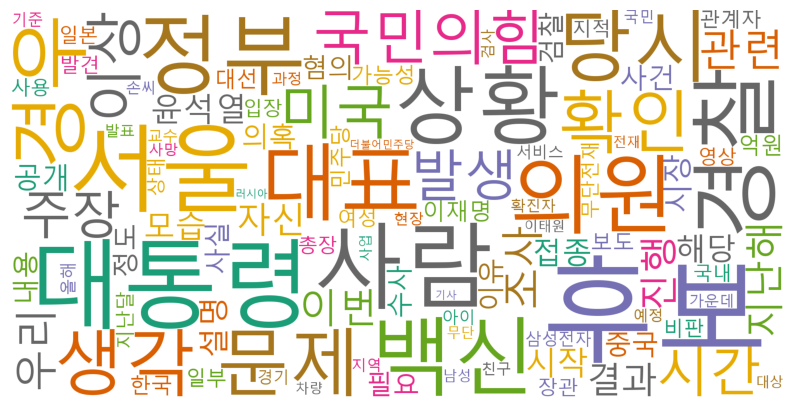

In [79]:
# 워드클라우드 생성
wc = WordCloud(font_path='malgun',width=2000, height=1000,background_color='white',colormap='Dark2',random_state=2)
wc.generate_from_frequencies(r4)

fig=plt.figure()
fig.set_size_inches(10,10)

plt.axis('off')
plt.imshow(wc)
plt.savefig(foldert + '/result1.png')

---

In [80]:
df_con2 = pd.read_csv(foldert + "/df_con.csv", encoding = 'utf-8-sig', index_col = 0)
df_con2

,idx,Date,Contents
0,0,20210505,"부친 타살 가능성 제기… 국민청원 30만경찰 ""모든 부분에 대해 차근차근 조사""확인..."
1,1,20210505,사흘 전 단속됐는데 문 잠그고 또 영업…경찰관 욕설·폭행도5일 오후 집합금지 명령을...
2,2,20210505,"유족과 의과대학 동기 70여명 눈물바다친구들 ""백만불짜리 미소 잊지 않을 것""성당 ..."
3,3,20210505,"경찰, 영상 삭제 요구 들어준 기사엔 '증거인멸' 혐의이달 중순 이 차관 소환조사 ..."
4,4,20210505,"확진자 나온 식품관만 폐쇄하다6일 하루 본점 전체 매장 휴업하기로""전 매장 방역 및..."
...,...,...,...
29310,13660,20221213,[디지털데일리 왕진화 기자] 게임 속 위치추적장치(GPS)만으로도 주변 빌딩을 장악...
29311,13661,20221213,[디지털데일리 백승은 기자] 7800조원과 0원. 지난 2014년 첫선을 보...
29312,13662,20221213,[디지털데일리 백승은 기자] LG전자(대표 조주완 배두용)가 'LG 채널' 서비...
29313,13663,20221213,[디지털데일리 박세아 기자] 이번 주 주간블록체인 시간이 돌아왔습니다. 지난주...


In [81]:
text2 = df_con2['Contents']
text_filtered2 = text2.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")

C:\Users\inven\AppData\Local\Temp\ipykernel_9552\2283754323.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  text_filtered2 = text2.str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]"," ")


In [82]:
len(text_filtered2)

29315

In [83]:
tokenized_data_filtered2=[]
for idx, j in enumerate(text_filtered2):
    print("idx =", idx)
    temp2 = tagger.nouns(j)
    temp2 = [word for word in temp2 if len(word)>1]  ## 두글자 이상이면 포함, 리스트 함축
    temp2 = [word for word in temp2 if word not in stopwords]
    tokenized_data_filtered2.append(temp2)

idx = 0
idx = 1
idx = 2
idx = 3
idx = 4
idx = 5
idx = 6
idx = 7
idx = 8
idx = 9
idx = 10
idx = 11
idx = 12
idx = 13
idx = 14
idx = 15
idx = 16
idx = 17
idx = 18
idx = 19
idx = 20
idx = 21
idx = 22
idx = 23
idx = 24
idx = 25
idx = 26
idx = 27
idx = 28
idx = 29
idx = 30
idx = 31
idx = 32
idx = 33
idx = 34
idx = 35
idx = 36
idx = 37
idx = 38
idx = 39
idx = 40
idx = 41
idx = 42
idx = 43
idx = 44
idx = 45
idx = 46
idx = 47
idx = 48
idx = 49
idx = 50
idx = 51
idx = 52
idx = 53
idx = 54
idx = 55
idx = 56
idx = 57
idx = 58
idx = 59
idx = 60
idx = 61
idx = 62
idx = 63
idx = 64
idx = 65
idx = 66
idx = 67
idx = 68
idx = 69
idx = 70
idx = 71
idx = 72
idx = 73
idx = 74
idx = 75
idx = 76
idx = 77
idx = 78
idx = 79
idx = 80
idx = 81
idx = 82
idx = 83
idx = 84
idx = 85
idx = 86
idx = 87
idx = 88
idx = 89
idx = 90
idx = 91
idx = 92
idx = 93
idx = 94
idx = 95
idx = 96
idx = 97
idx = 98
idx = 99
idx = 100
idx = 101
idx = 102
idx = 103
idx = 104
idx = 105
idx = 106
idx = 107
idx = 108
idx = 109
idx = 110


idx = 834
idx = 835
idx = 836
idx = 837
idx = 838
idx = 839
idx = 840
idx = 841
idx = 842
idx = 843
idx = 844
idx = 845
idx = 846
idx = 847
idx = 848
idx = 849
idx = 850
idx = 851
idx = 852
idx = 853
idx = 854
idx = 855
idx = 856
idx = 857
idx = 858
idx = 859
idx = 860
idx = 861
idx = 862
idx = 863
idx = 864
idx = 865
idx = 866
idx = 867
idx = 868
idx = 869
idx = 870
idx = 871
idx = 872
idx = 873
idx = 874
idx = 875
idx = 876
idx = 877
idx = 878
idx = 879
idx = 880
idx = 881
idx = 882
idx = 883
idx = 884
idx = 885
idx = 886
idx = 887
idx = 888
idx = 889
idx = 890
idx = 891
idx = 892
idx = 893
idx = 894
idx = 895
idx = 896
idx = 897
idx = 898
idx = 899
idx = 900
idx = 901
idx = 902
idx = 903
idx = 904
idx = 905
idx = 906
idx = 907
idx = 908
idx = 909
idx = 910
idx = 911
idx = 912
idx = 913
idx = 914
idx = 915
idx = 916
idx = 917
idx = 918
idx = 919
idx = 920
idx = 921
idx = 922
idx = 923
idx = 924
idx = 925
idx = 926
idx = 927
idx = 928
idx = 929
idx = 930
idx = 931
idx = 932
idx = 933


idx = 1598
idx = 1599
idx = 1600
idx = 1601
idx = 1602
idx = 1603
idx = 1604
idx = 1605
idx = 1606
idx = 1607
idx = 1608
idx = 1609
idx = 1610
idx = 1611
idx = 1612
idx = 1613
idx = 1614
idx = 1615
idx = 1616
idx = 1617
idx = 1618
idx = 1619
idx = 1620
idx = 1621
idx = 1622
idx = 1623
idx = 1624
idx = 1625
idx = 1626
idx = 1627
idx = 1628
idx = 1629
idx = 1630
idx = 1631
idx = 1632
idx = 1633
idx = 1634
idx = 1635
idx = 1636
idx = 1637
idx = 1638
idx = 1639
idx = 1640
idx = 1641
idx = 1642
idx = 1643
idx = 1644
idx = 1645
idx = 1646
idx = 1647
idx = 1648
idx = 1649
idx = 1650
idx = 1651
idx = 1652
idx = 1653
idx = 1654
idx = 1655
idx = 1656
idx = 1657
idx = 1658
idx = 1659
idx = 1660
idx = 1661
idx = 1662
idx = 1663
idx = 1664
idx = 1665
idx = 1666
idx = 1667
idx = 1668
idx = 1669
idx = 1670
idx = 1671
idx = 1672
idx = 1673
idx = 1674
idx = 1675
idx = 1676
idx = 1677
idx = 1678
idx = 1679
idx = 1680
idx = 1681
idx = 1682
idx = 1683
idx = 1684
idx = 1685
idx = 1686
idx = 1687
idx = 1688

idx = 2345
idx = 2346
idx = 2347
idx = 2348
idx = 2349
idx = 2350
idx = 2351
idx = 2352
idx = 2353
idx = 2354
idx = 2355
idx = 2356
idx = 2357
idx = 2358
idx = 2359
idx = 2360
idx = 2361
idx = 2362
idx = 2363
idx = 2364
idx = 2365
idx = 2366
idx = 2367
idx = 2368
idx = 2369
idx = 2370
idx = 2371
idx = 2372
idx = 2373
idx = 2374
idx = 2375
idx = 2376
idx = 2377
idx = 2378
idx = 2379
idx = 2380
idx = 2381
idx = 2382
idx = 2383
idx = 2384
idx = 2385
idx = 2386
idx = 2387
idx = 2388
idx = 2389
idx = 2390
idx = 2391
idx = 2392
idx = 2393
idx = 2394
idx = 2395
idx = 2396
idx = 2397
idx = 2398
idx = 2399
idx = 2400
idx = 2401
idx = 2402
idx = 2403
idx = 2404
idx = 2405
idx = 2406
idx = 2407
idx = 2408
idx = 2409
idx = 2410
idx = 2411
idx = 2412
idx = 2413
idx = 2414
idx = 2415
idx = 2416
idx = 2417
idx = 2418
idx = 2419
idx = 2420
idx = 2421
idx = 2422
idx = 2423
idx = 2424
idx = 2425
idx = 2426
idx = 2427
idx = 2428
idx = 2429
idx = 2430
idx = 2431
idx = 2432
idx = 2433
idx = 2434
idx = 2435

idx = 3090
idx = 3091
idx = 3092
idx = 3093
idx = 3094
idx = 3095
idx = 3096
idx = 3097
idx = 3098
idx = 3099
idx = 3100
idx = 3101
idx = 3102
idx = 3103
idx = 3104
idx = 3105
idx = 3106
idx = 3107
idx = 3108
idx = 3109
idx = 3110
idx = 3111
idx = 3112
idx = 3113
idx = 3114
idx = 3115
idx = 3116
idx = 3117
idx = 3118
idx = 3119
idx = 3120
idx = 3121
idx = 3122
idx = 3123
idx = 3124
idx = 3125
idx = 3126
idx = 3127
idx = 3128
idx = 3129
idx = 3130
idx = 3131
idx = 3132
idx = 3133
idx = 3134
idx = 3135
idx = 3136
idx = 3137
idx = 3138
idx = 3139
idx = 3140
idx = 3141
idx = 3142
idx = 3143
idx = 3144
idx = 3145
idx = 3146
idx = 3147
idx = 3148
idx = 3149
idx = 3150
idx = 3151
idx = 3152
idx = 3153
idx = 3154
idx = 3155
idx = 3156
idx = 3157
idx = 3158
idx = 3159
idx = 3160
idx = 3161
idx = 3162
idx = 3163
idx = 3164
idx = 3165
idx = 3166
idx = 3167
idx = 3168
idx = 3169
idx = 3170
idx = 3171
idx = 3172
idx = 3173
idx = 3174
idx = 3175
idx = 3176
idx = 3177
idx = 3178
idx = 3179
idx = 3180

idx = 3838
idx = 3839
idx = 3840
idx = 3841
idx = 3842
idx = 3843
idx = 3844
idx = 3845
idx = 3846
idx = 3847
idx = 3848
idx = 3849
idx = 3850
idx = 3851
idx = 3852
idx = 3853
idx = 3854
idx = 3855
idx = 3856
idx = 3857
idx = 3858
idx = 3859
idx = 3860
idx = 3861
idx = 3862
idx = 3863
idx = 3864
idx = 3865
idx = 3866
idx = 3867
idx = 3868
idx = 3869
idx = 3870
idx = 3871
idx = 3872
idx = 3873
idx = 3874
idx = 3875
idx = 3876
idx = 3877
idx = 3878
idx = 3879
idx = 3880
idx = 3881
idx = 3882
idx = 3883
idx = 3884
idx = 3885
idx = 3886
idx = 3887
idx = 3888
idx = 3889
idx = 3890
idx = 3891
idx = 3892
idx = 3893
idx = 3894
idx = 3895
idx = 3896
idx = 3897
idx = 3898
idx = 3899
idx = 3900
idx = 3901
idx = 3902
idx = 3903
idx = 3904
idx = 3905
idx = 3906
idx = 3907
idx = 3908
idx = 3909
idx = 3910
idx = 3911
idx = 3912
idx = 3913
idx = 3914
idx = 3915
idx = 3916
idx = 3917
idx = 3918
idx = 3919
idx = 3920
idx = 3921
idx = 3922
idx = 3923
idx = 3924
idx = 3925
idx = 3926
idx = 3927
idx = 3928

idx = 4584
idx = 4585
idx = 4586
idx = 4587
idx = 4588
idx = 4589
idx = 4590
idx = 4591
idx = 4592
idx = 4593
idx = 4594
idx = 4595
idx = 4596
idx = 4597
idx = 4598
idx = 4599
idx = 4600
idx = 4601
idx = 4602
idx = 4603
idx = 4604
idx = 4605
idx = 4606
idx = 4607
idx = 4608
idx = 4609
idx = 4610
idx = 4611
idx = 4612
idx = 4613
idx = 4614
idx = 4615
idx = 4616
idx = 4617
idx = 4618
idx = 4619
idx = 4620
idx = 4621
idx = 4622
idx = 4623
idx = 4624
idx = 4625
idx = 4626
idx = 4627
idx = 4628
idx = 4629
idx = 4630
idx = 4631
idx = 4632
idx = 4633
idx = 4634
idx = 4635
idx = 4636
idx = 4637
idx = 4638
idx = 4639
idx = 4640
idx = 4641
idx = 4642
idx = 4643
idx = 4644
idx = 4645
idx = 4646
idx = 4647
idx = 4648
idx = 4649
idx = 4650
idx = 4651
idx = 4652
idx = 4653
idx = 4654
idx = 4655
idx = 4656
idx = 4657
idx = 4658
idx = 4659
idx = 4660
idx = 4661
idx = 4662
idx = 4663
idx = 4664
idx = 4665
idx = 4666
idx = 4667
idx = 4668
idx = 4669
idx = 4670
idx = 4671
idx = 4672
idx = 4673
idx = 4674

idx = 5329
idx = 5330
idx = 5331
idx = 5332
idx = 5333
idx = 5334
idx = 5335
idx = 5336
idx = 5337
idx = 5338
idx = 5339
idx = 5340
idx = 5341
idx = 5342
idx = 5343
idx = 5344
idx = 5345
idx = 5346
idx = 5347
idx = 5348
idx = 5349
idx = 5350
idx = 5351
idx = 5352
idx = 5353
idx = 5354
idx = 5355
idx = 5356
idx = 5357
idx = 5358
idx = 5359
idx = 5360
idx = 5361
idx = 5362
idx = 5363
idx = 5364
idx = 5365
idx = 5366
idx = 5367
idx = 5368
idx = 5369
idx = 5370
idx = 5371
idx = 5372
idx = 5373
idx = 5374
idx = 5375
idx = 5376
idx = 5377
idx = 5378
idx = 5379
idx = 5380
idx = 5381
idx = 5382
idx = 5383
idx = 5384
idx = 5385
idx = 5386
idx = 5387
idx = 5388
idx = 5389
idx = 5390
idx = 5391
idx = 5392
idx = 5393
idx = 5394
idx = 5395
idx = 5396
idx = 5397
idx = 5398
idx = 5399
idx = 5400
idx = 5401
idx = 5402
idx = 5403
idx = 5404
idx = 5405
idx = 5406
idx = 5407
idx = 5408
idx = 5409
idx = 5410
idx = 5411
idx = 5412
idx = 5413
idx = 5414
idx = 5415
idx = 5416
idx = 5417
idx = 5418
idx = 5419

idx = 6075
idx = 6076
idx = 6077
idx = 6078
idx = 6079
idx = 6080
idx = 6081
idx = 6082
idx = 6083
idx = 6084
idx = 6085
idx = 6086
idx = 6087
idx = 6088
idx = 6089
idx = 6090
idx = 6091
idx = 6092
idx = 6093
idx = 6094
idx = 6095
idx = 6096
idx = 6097
idx = 6098
idx = 6099
idx = 6100
idx = 6101
idx = 6102
idx = 6103
idx = 6104
idx = 6105
idx = 6106
idx = 6107
idx = 6108
idx = 6109
idx = 6110
idx = 6111
idx = 6112
idx = 6113
idx = 6114
idx = 6115
idx = 6116
idx = 6117
idx = 6118
idx = 6119
idx = 6120
idx = 6121
idx = 6122
idx = 6123
idx = 6124
idx = 6125
idx = 6126
idx = 6127
idx = 6128
idx = 6129
idx = 6130
idx = 6131
idx = 6132
idx = 6133
idx = 6134
idx = 6135
idx = 6136
idx = 6137
idx = 6138
idx = 6139
idx = 6140
idx = 6141
idx = 6142
idx = 6143
idx = 6144
idx = 6145
idx = 6146
idx = 6147
idx = 6148
idx = 6149
idx = 6150
idx = 6151
idx = 6152
idx = 6153
idx = 6154
idx = 6155
idx = 6156
idx = 6157
idx = 6158
idx = 6159
idx = 6160
idx = 6161
idx = 6162
idx = 6163
idx = 6164
idx = 6165

idx = 6822
idx = 6823
idx = 6824
idx = 6825
idx = 6826
idx = 6827
idx = 6828
idx = 6829
idx = 6830
idx = 6831
idx = 6832
idx = 6833
idx = 6834
idx = 6835
idx = 6836
idx = 6837
idx = 6838
idx = 6839
idx = 6840
idx = 6841
idx = 6842
idx = 6843
idx = 6844
idx = 6845
idx = 6846
idx = 6847
idx = 6848
idx = 6849
idx = 6850
idx = 6851
idx = 6852
idx = 6853
idx = 6854
idx = 6855
idx = 6856
idx = 6857
idx = 6858
idx = 6859
idx = 6860
idx = 6861
idx = 6862
idx = 6863
idx = 6864
idx = 6865
idx = 6866
idx = 6867
idx = 6868
idx = 6869
idx = 6870
idx = 6871
idx = 6872
idx = 6873
idx = 6874
idx = 6875
idx = 6876
idx = 6877
idx = 6878
idx = 6879
idx = 6880
idx = 6881
idx = 6882
idx = 6883
idx = 6884
idx = 6885
idx = 6886
idx = 6887
idx = 6888
idx = 6889
idx = 6890
idx = 6891
idx = 6892
idx = 6893
idx = 6894
idx = 6895
idx = 6896
idx = 6897
idx = 6898
idx = 6899
idx = 6900
idx = 6901
idx = 6902
idx = 6903
idx = 6904
idx = 6905
idx = 6906
idx = 6907
idx = 6908
idx = 6909
idx = 6910
idx = 6911
idx = 6912

idx = 7567
idx = 7568
idx = 7569
idx = 7570
idx = 7571
idx = 7572
idx = 7573
idx = 7574
idx = 7575
idx = 7576
idx = 7577
idx = 7578
idx = 7579
idx = 7580
idx = 7581
idx = 7582
idx = 7583
idx = 7584
idx = 7585
idx = 7586
idx = 7587
idx = 7588
idx = 7589
idx = 7590
idx = 7591
idx = 7592
idx = 7593
idx = 7594
idx = 7595
idx = 7596
idx = 7597
idx = 7598
idx = 7599
idx = 7600
idx = 7601
idx = 7602
idx = 7603
idx = 7604
idx = 7605
idx = 7606
idx = 7607
idx = 7608
idx = 7609
idx = 7610
idx = 7611
idx = 7612
idx = 7613
idx = 7614
idx = 7615
idx = 7616
idx = 7617
idx = 7618
idx = 7619
idx = 7620
idx = 7621
idx = 7622
idx = 7623
idx = 7624
idx = 7625
idx = 7626
idx = 7627
idx = 7628
idx = 7629
idx = 7630
idx = 7631
idx = 7632
idx = 7633
idx = 7634
idx = 7635
idx = 7636
idx = 7637
idx = 7638
idx = 7639
idx = 7640
idx = 7641
idx = 7642
idx = 7643
idx = 7644
idx = 7645
idx = 7646
idx = 7647
idx = 7648
idx = 7649
idx = 7650
idx = 7651
idx = 7652
idx = 7653
idx = 7654
idx = 7655
idx = 7656
idx = 7657

idx = 8313
idx = 8314
idx = 8315
idx = 8316
idx = 8317
idx = 8318
idx = 8319
idx = 8320
idx = 8321
idx = 8322
idx = 8323
idx = 8324
idx = 8325
idx = 8326
idx = 8327
idx = 8328
idx = 8329
idx = 8330
idx = 8331
idx = 8332
idx = 8333
idx = 8334
idx = 8335
idx = 8336
idx = 8337
idx = 8338
idx = 8339
idx = 8340
idx = 8341
idx = 8342
idx = 8343
idx = 8344
idx = 8345
idx = 8346
idx = 8347
idx = 8348
idx = 8349
idx = 8350
idx = 8351
idx = 8352
idx = 8353
idx = 8354
idx = 8355
idx = 8356
idx = 8357
idx = 8358
idx = 8359
idx = 8360
idx = 8361
idx = 8362
idx = 8363
idx = 8364
idx = 8365
idx = 8366
idx = 8367
idx = 8368
idx = 8369
idx = 8370
idx = 8371
idx = 8372
idx = 8373
idx = 8374
idx = 8375
idx = 8376
idx = 8377
idx = 8378
idx = 8379
idx = 8380
idx = 8381
idx = 8382
idx = 8383
idx = 8384
idx = 8385
idx = 8386
idx = 8387
idx = 8388
idx = 8389
idx = 8390
idx = 8391
idx = 8392
idx = 8393
idx = 8394
idx = 8395
idx = 8396
idx = 8397
idx = 8398
idx = 8399
idx = 8400
idx = 8401
idx = 8402
idx = 8403

idx = 9058
idx = 9059
idx = 9060
idx = 9061
idx = 9062
idx = 9063
idx = 9064
idx = 9065
idx = 9066
idx = 9067
idx = 9068
idx = 9069
idx = 9070
idx = 9071
idx = 9072
idx = 9073
idx = 9074
idx = 9075
idx = 9076
idx = 9077
idx = 9078
idx = 9079
idx = 9080
idx = 9081
idx = 9082
idx = 9083
idx = 9084
idx = 9085
idx = 9086
idx = 9087
idx = 9088
idx = 9089
idx = 9090
idx = 9091
idx = 9092
idx = 9093
idx = 9094
idx = 9095
idx = 9096
idx = 9097
idx = 9098
idx = 9099
idx = 9100
idx = 9101
idx = 9102
idx = 9103
idx = 9104
idx = 9105
idx = 9106
idx = 9107
idx = 9108
idx = 9109
idx = 9110
idx = 9111
idx = 9112
idx = 9113
idx = 9114
idx = 9115
idx = 9116
idx = 9117
idx = 9118
idx = 9119
idx = 9120
idx = 9121
idx = 9122
idx = 9123
idx = 9124
idx = 9125
idx = 9126
idx = 9127
idx = 9128
idx = 9129
idx = 9130
idx = 9131
idx = 9132
idx = 9133
idx = 9134
idx = 9135
idx = 9136
idx = 9137
idx = 9138
idx = 9139
idx = 9140
idx = 9141
idx = 9142
idx = 9143
idx = 9144
idx = 9145
idx = 9146
idx = 9147
idx = 9148

idx = 9805
idx = 9806
idx = 9807
idx = 9808
idx = 9809
idx = 9810
idx = 9811
idx = 9812
idx = 9813
idx = 9814
idx = 9815
idx = 9816
idx = 9817
idx = 9818
idx = 9819
idx = 9820
idx = 9821
idx = 9822
idx = 9823
idx = 9824
idx = 9825
idx = 9826
idx = 9827
idx = 9828
idx = 9829
idx = 9830
idx = 9831
idx = 9832
idx = 9833
idx = 9834
idx = 9835
idx = 9836
idx = 9837
idx = 9838
idx = 9839
idx = 9840
idx = 9841
idx = 9842
idx = 9843
idx = 9844
idx = 9845
idx = 9846
idx = 9847
idx = 9848
idx = 9849
idx = 9850
idx = 9851
idx = 9852
idx = 9853
idx = 9854
idx = 9855
idx = 9856
idx = 9857
idx = 9858
idx = 9859
idx = 9860
idx = 9861
idx = 9862
idx = 9863
idx = 9864
idx = 9865
idx = 9866
idx = 9867
idx = 9868
idx = 9869
idx = 9870
idx = 9871
idx = 9872
idx = 9873
idx = 9874
idx = 9875
idx = 9876
idx = 9877
idx = 9878
idx = 9879
idx = 9880
idx = 9881
idx = 9882
idx = 9883
idx = 9884
idx = 9885
idx = 9886
idx = 9887
idx = 9888
idx = 9889
idx = 9890
idx = 9891
idx = 9892
idx = 9893
idx = 9894
idx = 9895

idx = 10504
idx = 10505
idx = 10506
idx = 10507
idx = 10508
idx = 10509
idx = 10510
idx = 10511
idx = 10512
idx = 10513
idx = 10514
idx = 10515
idx = 10516
idx = 10517
idx = 10518
idx = 10519
idx = 10520
idx = 10521
idx = 10522
idx = 10523
idx = 10524
idx = 10525
idx = 10526
idx = 10527
idx = 10528
idx = 10529
idx = 10530
idx = 10531
idx = 10532
idx = 10533
idx = 10534
idx = 10535
idx = 10536
idx = 10537
idx = 10538
idx = 10539
idx = 10540
idx = 10541
idx = 10542
idx = 10543
idx = 10544
idx = 10545
idx = 10546
idx = 10547
idx = 10548
idx = 10549
idx = 10550
idx = 10551
idx = 10552
idx = 10553
idx = 10554
idx = 10555
idx = 10556
idx = 10557
idx = 10558
idx = 10559
idx = 10560
idx = 10561
idx = 10562
idx = 10563
idx = 10564
idx = 10565
idx = 10566
idx = 10567
idx = 10568
idx = 10569
idx = 10570
idx = 10571
idx = 10572
idx = 10573
idx = 10574
idx = 10575
idx = 10576
idx = 10577
idx = 10578
idx = 10579
idx = 10580
idx = 10581
idx = 10582
idx = 10583
idx = 10584
idx = 10585
idx = 10586
idx 

idx = 11187
idx = 11188
idx = 11189
idx = 11190
idx = 11191
idx = 11192
idx = 11193
idx = 11194
idx = 11195
idx = 11196
idx = 11197
idx = 11198
idx = 11199
idx = 11200
idx = 11201
idx = 11202
idx = 11203
idx = 11204
idx = 11205
idx = 11206
idx = 11207
idx = 11208
idx = 11209
idx = 11210
idx = 11211
idx = 11212
idx = 11213
idx = 11214
idx = 11215
idx = 11216
idx = 11217
idx = 11218
idx = 11219
idx = 11220
idx = 11221
idx = 11222
idx = 11223
idx = 11224
idx = 11225
idx = 11226
idx = 11227
idx = 11228
idx = 11229
idx = 11230
idx = 11231
idx = 11232
idx = 11233
idx = 11234
idx = 11235
idx = 11236
idx = 11237
idx = 11238
idx = 11239
idx = 11240
idx = 11241
idx = 11242
idx = 11243
idx = 11244
idx = 11245
idx = 11246
idx = 11247
idx = 11248
idx = 11249
idx = 11250
idx = 11251
idx = 11252
idx = 11253
idx = 11254
idx = 11255
idx = 11256
idx = 11257
idx = 11258
idx = 11259
idx = 11260
idx = 11261
idx = 11262
idx = 11263
idx = 11264
idx = 11265
idx = 11266
idx = 11267
idx = 11268
idx = 11269
idx 

idx = 11871
idx = 11872
idx = 11873
idx = 11874
idx = 11875
idx = 11876
idx = 11877
idx = 11878
idx = 11879
idx = 11880
idx = 11881
idx = 11882
idx = 11883
idx = 11884
idx = 11885
idx = 11886
idx = 11887
idx = 11888
idx = 11889
idx = 11890
idx = 11891
idx = 11892
idx = 11893
idx = 11894
idx = 11895
idx = 11896
idx = 11897
idx = 11898
idx = 11899
idx = 11900
idx = 11901
idx = 11902
idx = 11903
idx = 11904
idx = 11905
idx = 11906
idx = 11907
idx = 11908
idx = 11909
idx = 11910
idx = 11911
idx = 11912
idx = 11913
idx = 11914
idx = 11915
idx = 11916
idx = 11917
idx = 11918
idx = 11919
idx = 11920
idx = 11921
idx = 11922
idx = 11923
idx = 11924
idx = 11925
idx = 11926
idx = 11927
idx = 11928
idx = 11929
idx = 11930
idx = 11931
idx = 11932
idx = 11933
idx = 11934
idx = 11935
idx = 11936
idx = 11937
idx = 11938
idx = 11939
idx = 11940
idx = 11941
idx = 11942
idx = 11943
idx = 11944
idx = 11945
idx = 11946
idx = 11947
idx = 11948
idx = 11949
idx = 11950
idx = 11951
idx = 11952
idx = 11953
idx 

idx = 12555
idx = 12556
idx = 12557
idx = 12558
idx = 12559
idx = 12560
idx = 12561
idx = 12562
idx = 12563
idx = 12564
idx = 12565
idx = 12566
idx = 12567
idx = 12568
idx = 12569
idx = 12570
idx = 12571
idx = 12572
idx = 12573
idx = 12574
idx = 12575
idx = 12576
idx = 12577
idx = 12578
idx = 12579
idx = 12580
idx = 12581
idx = 12582
idx = 12583
idx = 12584
idx = 12585
idx = 12586
idx = 12587
idx = 12588
idx = 12589
idx = 12590
idx = 12591
idx = 12592
idx = 12593
idx = 12594
idx = 12595
idx = 12596
idx = 12597
idx = 12598
idx = 12599
idx = 12600
idx = 12601
idx = 12602
idx = 12603
idx = 12604
idx = 12605
idx = 12606
idx = 12607
idx = 12608
idx = 12609
idx = 12610
idx = 12611
idx = 12612
idx = 12613
idx = 12614
idx = 12615
idx = 12616
idx = 12617
idx = 12618
idx = 12619
idx = 12620
idx = 12621
idx = 12622
idx = 12623
idx = 12624
idx = 12625
idx = 12626
idx = 12627
idx = 12628
idx = 12629
idx = 12630
idx = 12631
idx = 12632
idx = 12633
idx = 12634
idx = 12635
idx = 12636
idx = 12637
idx 

idx = 13239
idx = 13240
idx = 13241
idx = 13242
idx = 13243
idx = 13244
idx = 13245
idx = 13246
idx = 13247
idx = 13248
idx = 13249
idx = 13250
idx = 13251
idx = 13252
idx = 13253
idx = 13254
idx = 13255
idx = 13256
idx = 13257
idx = 13258
idx = 13259
idx = 13260
idx = 13261
idx = 13262
idx = 13263
idx = 13264
idx = 13265
idx = 13266
idx = 13267
idx = 13268
idx = 13269
idx = 13270
idx = 13271
idx = 13272
idx = 13273
idx = 13274
idx = 13275
idx = 13276
idx = 13277
idx = 13278
idx = 13279
idx = 13280
idx = 13281
idx = 13282
idx = 13283
idx = 13284
idx = 13285
idx = 13286
idx = 13287
idx = 13288
idx = 13289
idx = 13290
idx = 13291
idx = 13292
idx = 13293
idx = 13294
idx = 13295
idx = 13296
idx = 13297
idx = 13298
idx = 13299
idx = 13300
idx = 13301
idx = 13302
idx = 13303
idx = 13304
idx = 13305
idx = 13306
idx = 13307
idx = 13308
idx = 13309
idx = 13310
idx = 13311
idx = 13312
idx = 13313
idx = 13314
idx = 13315
idx = 13316
idx = 13317
idx = 13318
idx = 13319
idx = 13320
idx = 13321
idx 

idx = 13922
idx = 13923
idx = 13924
idx = 13925
idx = 13926
idx = 13927
idx = 13928
idx = 13929
idx = 13930
idx = 13931
idx = 13932
idx = 13933
idx = 13934
idx = 13935
idx = 13936
idx = 13937
idx = 13938
idx = 13939
idx = 13940
idx = 13941
idx = 13942
idx = 13943
idx = 13944
idx = 13945
idx = 13946
idx = 13947
idx = 13948
idx = 13949
idx = 13950
idx = 13951
idx = 13952
idx = 13953
idx = 13954
idx = 13955
idx = 13956
idx = 13957
idx = 13958
idx = 13959
idx = 13960
idx = 13961
idx = 13962
idx = 13963
idx = 13964
idx = 13965
idx = 13966
idx = 13967
idx = 13968
idx = 13969
idx = 13970
idx = 13971
idx = 13972
idx = 13973
idx = 13974
idx = 13975
idx = 13976
idx = 13977
idx = 13978
idx = 13979
idx = 13980
idx = 13981
idx = 13982
idx = 13983
idx = 13984
idx = 13985
idx = 13986
idx = 13987
idx = 13988
idx = 13989
idx = 13990
idx = 13991
idx = 13992
idx = 13993
idx = 13994
idx = 13995
idx = 13996
idx = 13997
idx = 13998
idx = 13999
idx = 14000
idx = 14001
idx = 14002
idx = 14003
idx = 14004
idx 

idx = 14607
idx = 14608
idx = 14609
idx = 14610
idx = 14611
idx = 14612
idx = 14613
idx = 14614
idx = 14615
idx = 14616
idx = 14617
idx = 14618
idx = 14619
idx = 14620
idx = 14621
idx = 14622
idx = 14623
idx = 14624
idx = 14625
idx = 14626
idx = 14627
idx = 14628
idx = 14629
idx = 14630
idx = 14631
idx = 14632
idx = 14633
idx = 14634
idx = 14635
idx = 14636
idx = 14637
idx = 14638
idx = 14639
idx = 14640
idx = 14641
idx = 14642
idx = 14643
idx = 14644
idx = 14645
idx = 14646
idx = 14647
idx = 14648
idx = 14649
idx = 14650
idx = 14651
idx = 14652
idx = 14653
idx = 14654
idx = 14655
idx = 14656
idx = 14657
idx = 14658
idx = 14659
idx = 14660
idx = 14661
idx = 14662
idx = 14663
idx = 14664
idx = 14665
idx = 14666
idx = 14667
idx = 14668
idx = 14669
idx = 14670
idx = 14671
idx = 14672
idx = 14673
idx = 14674
idx = 14675
idx = 14676
idx = 14677
idx = 14678
idx = 14679
idx = 14680
idx = 14681
idx = 14682
idx = 14683
idx = 14684
idx = 14685
idx = 14686
idx = 14687
idx = 14688
idx = 14689
idx 

idx = 15290
idx = 15291
idx = 15292
idx = 15293
idx = 15294
idx = 15295
idx = 15296
idx = 15297
idx = 15298
idx = 15299
idx = 15300
idx = 15301
idx = 15302
idx = 15303
idx = 15304
idx = 15305
idx = 15306
idx = 15307
idx = 15308
idx = 15309
idx = 15310
idx = 15311
idx = 15312
idx = 15313
idx = 15314
idx = 15315
idx = 15316
idx = 15317
idx = 15318
idx = 15319
idx = 15320
idx = 15321
idx = 15322
idx = 15323
idx = 15324
idx = 15325
idx = 15326
idx = 15327
idx = 15328
idx = 15329
idx = 15330
idx = 15331
idx = 15332
idx = 15333
idx = 15334
idx = 15335
idx = 15336
idx = 15337
idx = 15338
idx = 15339
idx = 15340
idx = 15341
idx = 15342
idx = 15343
idx = 15344
idx = 15345
idx = 15346
idx = 15347
idx = 15348
idx = 15349
idx = 15350
idx = 15351
idx = 15352
idx = 15353
idx = 15354
idx = 15355
idx = 15356
idx = 15357
idx = 15358
idx = 15359
idx = 15360
idx = 15361
idx = 15362
idx = 15363
idx = 15364
idx = 15365
idx = 15366
idx = 15367
idx = 15368
idx = 15369
idx = 15370
idx = 15371
idx = 15372
idx 

idx = 15977
idx = 15978
idx = 15979
idx = 15980
idx = 15981
idx = 15982
idx = 15983
idx = 15984
idx = 15985
idx = 15986
idx = 15987
idx = 15988
idx = 15989
idx = 15990
idx = 15991
idx = 15992
idx = 15993
idx = 15994
idx = 15995
idx = 15996
idx = 15997
idx = 15998
idx = 15999
idx = 16000
idx = 16001
idx = 16002
idx = 16003
idx = 16004
idx = 16005
idx = 16006
idx = 16007
idx = 16008
idx = 16009
idx = 16010
idx = 16011
idx = 16012
idx = 16013
idx = 16014
idx = 16015
idx = 16016
idx = 16017
idx = 16018
idx = 16019
idx = 16020
idx = 16021
idx = 16022
idx = 16023
idx = 16024
idx = 16025
idx = 16026
idx = 16027
idx = 16028
idx = 16029
idx = 16030
idx = 16031
idx = 16032
idx = 16033
idx = 16034
idx = 16035
idx = 16036
idx = 16037
idx = 16038
idx = 16039
idx = 16040
idx = 16041
idx = 16042
idx = 16043
idx = 16044
idx = 16045
idx = 16046
idx = 16047
idx = 16048
idx = 16049
idx = 16050
idx = 16051
idx = 16052
idx = 16053
idx = 16054
idx = 16055
idx = 16056
idx = 16057
idx = 16058
idx = 16059
idx 

idx = 16666
idx = 16667
idx = 16668
idx = 16669
idx = 16670
idx = 16671
idx = 16672
idx = 16673
idx = 16674
idx = 16675
idx = 16676
idx = 16677
idx = 16678
idx = 16679
idx = 16680
idx = 16681
idx = 16682
idx = 16683
idx = 16684
idx = 16685
idx = 16686
idx = 16687
idx = 16688
idx = 16689
idx = 16690
idx = 16691
idx = 16692
idx = 16693
idx = 16694
idx = 16695
idx = 16696
idx = 16697
idx = 16698
idx = 16699
idx = 16700
idx = 16701
idx = 16702
idx = 16703
idx = 16704
idx = 16705
idx = 16706
idx = 16707
idx = 16708
idx = 16709
idx = 16710
idx = 16711
idx = 16712
idx = 16713
idx = 16714
idx = 16715
idx = 16716
idx = 16717
idx = 16718
idx = 16719
idx = 16720
idx = 16721
idx = 16722
idx = 16723
idx = 16724
idx = 16725
idx = 16726
idx = 16727
idx = 16728
idx = 16729
idx = 16730
idx = 16731
idx = 16732
idx = 16733
idx = 16734
idx = 16735
idx = 16736
idx = 16737
idx = 16738
idx = 16739
idx = 16740
idx = 16741
idx = 16742
idx = 16743
idx = 16744
idx = 16745
idx = 16746
idx = 16747
idx = 16748
idx 

idx = 17349
idx = 17350
idx = 17351
idx = 17352
idx = 17353
idx = 17354
idx = 17355
idx = 17356
idx = 17357
idx = 17358
idx = 17359
idx = 17360
idx = 17361
idx = 17362
idx = 17363
idx = 17364
idx = 17365
idx = 17366
idx = 17367
idx = 17368
idx = 17369
idx = 17370
idx = 17371
idx = 17372
idx = 17373
idx = 17374
idx = 17375
idx = 17376
idx = 17377
idx = 17378
idx = 17379
idx = 17380
idx = 17381
idx = 17382
idx = 17383
idx = 17384
idx = 17385
idx = 17386
idx = 17387
idx = 17388
idx = 17389
idx = 17390
idx = 17391
idx = 17392
idx = 17393
idx = 17394
idx = 17395
idx = 17396
idx = 17397
idx = 17398
idx = 17399
idx = 17400
idx = 17401
idx = 17402
idx = 17403
idx = 17404
idx = 17405
idx = 17406
idx = 17407
idx = 17408
idx = 17409
idx = 17410
idx = 17411
idx = 17412
idx = 17413
idx = 17414
idx = 17415
idx = 17416
idx = 17417
idx = 17418
idx = 17419
idx = 17420
idx = 17421
idx = 17422
idx = 17423
idx = 17424
idx = 17425
idx = 17426
idx = 17427
idx = 17428
idx = 17429
idx = 17430
idx = 17431
idx 

idx = 18032
idx = 18033
idx = 18034
idx = 18035
idx = 18036
idx = 18037
idx = 18038
idx = 18039
idx = 18040
idx = 18041
idx = 18042
idx = 18043
idx = 18044
idx = 18045
idx = 18046
idx = 18047
idx = 18048
idx = 18049
idx = 18050
idx = 18051
idx = 18052
idx = 18053
idx = 18054
idx = 18055
idx = 18056
idx = 18057
idx = 18058
idx = 18059
idx = 18060
idx = 18061
idx = 18062
idx = 18063
idx = 18064
idx = 18065
idx = 18066
idx = 18067
idx = 18068
idx = 18069
idx = 18070
idx = 18071
idx = 18072
idx = 18073
idx = 18074
idx = 18075
idx = 18076
idx = 18077
idx = 18078
idx = 18079
idx = 18080
idx = 18081
idx = 18082
idx = 18083
idx = 18084
idx = 18085
idx = 18086
idx = 18087
idx = 18088
idx = 18089
idx = 18090
idx = 18091
idx = 18092
idx = 18093
idx = 18094
idx = 18095
idx = 18096
idx = 18097
idx = 18098
idx = 18099
idx = 18100
idx = 18101
idx = 18102
idx = 18103
idx = 18104
idx = 18105
idx = 18106
idx = 18107
idx = 18108
idx = 18109
idx = 18110
idx = 18111
idx = 18112
idx = 18113
idx = 18114
idx 

idx = 18716
idx = 18717
idx = 18718
idx = 18719
idx = 18720
idx = 18721
idx = 18722
idx = 18723
idx = 18724
idx = 18725
idx = 18726
idx = 18727
idx = 18728
idx = 18729
idx = 18730
idx = 18731
idx = 18732
idx = 18733
idx = 18734
idx = 18735
idx = 18736
idx = 18737
idx = 18738
idx = 18739
idx = 18740
idx = 18741
idx = 18742
idx = 18743
idx = 18744
idx = 18745
idx = 18746
idx = 18747
idx = 18748
idx = 18749
idx = 18750
idx = 18751
idx = 18752
idx = 18753
idx = 18754
idx = 18755
idx = 18756
idx = 18757
idx = 18758
idx = 18759
idx = 18760
idx = 18761
idx = 18762
idx = 18763
idx = 18764
idx = 18765
idx = 18766
idx = 18767
idx = 18768
idx = 18769
idx = 18770
idx = 18771
idx = 18772
idx = 18773
idx = 18774
idx = 18775
idx = 18776
idx = 18777
idx = 18778
idx = 18779
idx = 18780
idx = 18781
idx = 18782
idx = 18783
idx = 18784
idx = 18785
idx = 18786
idx = 18787
idx = 18788
idx = 18789
idx = 18790
idx = 18791
idx = 18792
idx = 18793
idx = 18794
idx = 18795
idx = 18796
idx = 18797
idx = 18798
idx 

idx = 19401
idx = 19402
idx = 19403
idx = 19404
idx = 19405
idx = 19406
idx = 19407
idx = 19408
idx = 19409
idx = 19410
idx = 19411
idx = 19412
idx = 19413
idx = 19414
idx = 19415
idx = 19416
idx = 19417
idx = 19418
idx = 19419
idx = 19420
idx = 19421
idx = 19422
idx = 19423
idx = 19424
idx = 19425
idx = 19426
idx = 19427
idx = 19428
idx = 19429
idx = 19430
idx = 19431
idx = 19432
idx = 19433
idx = 19434
idx = 19435
idx = 19436
idx = 19437
idx = 19438
idx = 19439
idx = 19440
idx = 19441
idx = 19442
idx = 19443
idx = 19444
idx = 19445
idx = 19446
idx = 19447
idx = 19448
idx = 19449
idx = 19450
idx = 19451
idx = 19452
idx = 19453
idx = 19454
idx = 19455
idx = 19456
idx = 19457
idx = 19458
idx = 19459
idx = 19460
idx = 19461
idx = 19462
idx = 19463
idx = 19464
idx = 19465
idx = 19466
idx = 19467
idx = 19468
idx = 19469
idx = 19470
idx = 19471
idx = 19472
idx = 19473
idx = 19474
idx = 19475
idx = 19476
idx = 19477
idx = 19478
idx = 19479
idx = 19480
idx = 19481
idx = 19482
idx = 19483
idx 

idx = 20084
idx = 20085
idx = 20086
idx = 20087
idx = 20088
idx = 20089
idx = 20090
idx = 20091
idx = 20092
idx = 20093
idx = 20094
idx = 20095
idx = 20096
idx = 20097
idx = 20098
idx = 20099
idx = 20100
idx = 20101
idx = 20102
idx = 20103
idx = 20104
idx = 20105
idx = 20106
idx = 20107
idx = 20108
idx = 20109
idx = 20110
idx = 20111
idx = 20112
idx = 20113
idx = 20114
idx = 20115
idx = 20116
idx = 20117
idx = 20118
idx = 20119
idx = 20120
idx = 20121
idx = 20122
idx = 20123
idx = 20124
idx = 20125
idx = 20126
idx = 20127
idx = 20128
idx = 20129
idx = 20130
idx = 20131
idx = 20132
idx = 20133
idx = 20134
idx = 20135
idx = 20136
idx = 20137
idx = 20138
idx = 20139
idx = 20140
idx = 20141
idx = 20142
idx = 20143
idx = 20144
idx = 20145
idx = 20146
idx = 20147
idx = 20148
idx = 20149
idx = 20150
idx = 20151
idx = 20152
idx = 20153
idx = 20154
idx = 20155
idx = 20156
idx = 20157
idx = 20158
idx = 20159
idx = 20160
idx = 20161
idx = 20162
idx = 20163
idx = 20164
idx = 20165
idx = 20166
idx 

idx = 20769
idx = 20770
idx = 20771
idx = 20772
idx = 20773
idx = 20774
idx = 20775
idx = 20776
idx = 20777
idx = 20778
idx = 20779
idx = 20780
idx = 20781
idx = 20782
idx = 20783
idx = 20784
idx = 20785
idx = 20786
idx = 20787
idx = 20788
idx = 20789
idx = 20790
idx = 20791
idx = 20792
idx = 20793
idx = 20794
idx = 20795
idx = 20796
idx = 20797
idx = 20798
idx = 20799
idx = 20800
idx = 20801
idx = 20802
idx = 20803
idx = 20804
idx = 20805
idx = 20806
idx = 20807
idx = 20808
idx = 20809
idx = 20810
idx = 20811
idx = 20812
idx = 20813
idx = 20814
idx = 20815
idx = 20816
idx = 20817
idx = 20818
idx = 20819
idx = 20820
idx = 20821
idx = 20822
idx = 20823
idx = 20824
idx = 20825
idx = 20826
idx = 20827
idx = 20828
idx = 20829
idx = 20830
idx = 20831
idx = 20832
idx = 20833
idx = 20834
idx = 20835
idx = 20836
idx = 20837
idx = 20838
idx = 20839
idx = 20840
idx = 20841
idx = 20842
idx = 20843
idx = 20844
idx = 20845
idx = 20846
idx = 20847
idx = 20848
idx = 20849
idx = 20850
idx = 20851
idx 

idx = 21453
idx = 21454
idx = 21455
idx = 21456
idx = 21457
idx = 21458
idx = 21459
idx = 21460
idx = 21461
idx = 21462
idx = 21463
idx = 21464
idx = 21465
idx = 21466
idx = 21467
idx = 21468
idx = 21469
idx = 21470
idx = 21471
idx = 21472
idx = 21473
idx = 21474
idx = 21475
idx = 21476
idx = 21477
idx = 21478
idx = 21479
idx = 21480
idx = 21481
idx = 21482
idx = 21483
idx = 21484
idx = 21485
idx = 21486
idx = 21487
idx = 21488
idx = 21489
idx = 21490
idx = 21491
idx = 21492
idx = 21493
idx = 21494
idx = 21495
idx = 21496
idx = 21497
idx = 21498
idx = 21499
idx = 21500
idx = 21501
idx = 21502
idx = 21503
idx = 21504
idx = 21505
idx = 21506
idx = 21507
idx = 21508
idx = 21509
idx = 21510
idx = 21511
idx = 21512
idx = 21513
idx = 21514
idx = 21515
idx = 21516
idx = 21517
idx = 21518
idx = 21519
idx = 21520
idx = 21521
idx = 21522
idx = 21523
idx = 21524
idx = 21525
idx = 21526
idx = 21527
idx = 21528
idx = 21529
idx = 21530
idx = 21531
idx = 21532
idx = 21533
idx = 21534
idx = 21535
idx 

idx = 22136
idx = 22137
idx = 22138
idx = 22139
idx = 22140
idx = 22141
idx = 22142
idx = 22143
idx = 22144
idx = 22145
idx = 22146
idx = 22147
idx = 22148
idx = 22149
idx = 22150
idx = 22151
idx = 22152
idx = 22153
idx = 22154
idx = 22155
idx = 22156
idx = 22157
idx = 22158
idx = 22159
idx = 22160
idx = 22161
idx = 22162
idx = 22163
idx = 22164
idx = 22165
idx = 22166
idx = 22167
idx = 22168
idx = 22169
idx = 22170
idx = 22171
idx = 22172
idx = 22173
idx = 22174
idx = 22175
idx = 22176
idx = 22177
idx = 22178
idx = 22179
idx = 22180
idx = 22181
idx = 22182
idx = 22183
idx = 22184
idx = 22185
idx = 22186
idx = 22187
idx = 22188
idx = 22189
idx = 22190
idx = 22191
idx = 22192
idx = 22193
idx = 22194
idx = 22195
idx = 22196
idx = 22197
idx = 22198
idx = 22199
idx = 22200
idx = 22201
idx = 22202
idx = 22203
idx = 22204
idx = 22205
idx = 22206
idx = 22207
idx = 22208
idx = 22209
idx = 22210
idx = 22211
idx = 22212
idx = 22213
idx = 22214
idx = 22215
idx = 22216
idx = 22217
idx = 22218
idx 

idx = 22819
idx = 22820
idx = 22821
idx = 22822
idx = 22823
idx = 22824
idx = 22825
idx = 22826
idx = 22827
idx = 22828
idx = 22829
idx = 22830
idx = 22831
idx = 22832
idx = 22833
idx = 22834
idx = 22835
idx = 22836
idx = 22837
idx = 22838
idx = 22839
idx = 22840
idx = 22841
idx = 22842
idx = 22843
idx = 22844
idx = 22845
idx = 22846
idx = 22847
idx = 22848
idx = 22849
idx = 22850
idx = 22851
idx = 22852
idx = 22853
idx = 22854
idx = 22855
idx = 22856
idx = 22857
idx = 22858
idx = 22859
idx = 22860
idx = 22861
idx = 22862
idx = 22863
idx = 22864
idx = 22865
idx = 22866
idx = 22867
idx = 22868
idx = 22869
idx = 22870
idx = 22871
idx = 22872
idx = 22873
idx = 22874
idx = 22875
idx = 22876
idx = 22877
idx = 22878
idx = 22879
idx = 22880
idx = 22881
idx = 22882
idx = 22883
idx = 22884
idx = 22885
idx = 22886
idx = 22887
idx = 22888
idx = 22889
idx = 22890
idx = 22891
idx = 22892
idx = 22893
idx = 22894
idx = 22895
idx = 22896
idx = 22897
idx = 22898
idx = 22899
idx = 22900
idx = 22901
idx 

idx = 23504
idx = 23505
idx = 23506
idx = 23507
idx = 23508
idx = 23509
idx = 23510
idx = 23511
idx = 23512
idx = 23513
idx = 23514
idx = 23515
idx = 23516
idx = 23517
idx = 23518
idx = 23519
idx = 23520
idx = 23521
idx = 23522
idx = 23523
idx = 23524
idx = 23525
idx = 23526
idx = 23527
idx = 23528
idx = 23529
idx = 23530
idx = 23531
idx = 23532
idx = 23533
idx = 23534
idx = 23535
idx = 23536
idx = 23537
idx = 23538
idx = 23539
idx = 23540
idx = 23541
idx = 23542
idx = 23543
idx = 23544
idx = 23545
idx = 23546
idx = 23547
idx = 23548
idx = 23549
idx = 23550
idx = 23551
idx = 23552
idx = 23553
idx = 23554
idx = 23555
idx = 23556
idx = 23557
idx = 23558
idx = 23559
idx = 23560
idx = 23561
idx = 23562
idx = 23563
idx = 23564
idx = 23565
idx = 23566
idx = 23567
idx = 23568
idx = 23569
idx = 23570
idx = 23571
idx = 23572
idx = 23573
idx = 23574
idx = 23575
idx = 23576
idx = 23577
idx = 23578
idx = 23579
idx = 23580
idx = 23581
idx = 23582
idx = 23583
idx = 23584
idx = 23585
idx = 23586
idx 

idx = 24187
idx = 24188
idx = 24189
idx = 24190
idx = 24191
idx = 24192
idx = 24193
idx = 24194
idx = 24195
idx = 24196
idx = 24197
idx = 24198
idx = 24199
idx = 24200
idx = 24201
idx = 24202
idx = 24203
idx = 24204
idx = 24205
idx = 24206
idx = 24207
idx = 24208
idx = 24209
idx = 24210
idx = 24211
idx = 24212
idx = 24213
idx = 24214
idx = 24215
idx = 24216
idx = 24217
idx = 24218
idx = 24219
idx = 24220
idx = 24221
idx = 24222
idx = 24223
idx = 24224
idx = 24225
idx = 24226
idx = 24227
idx = 24228
idx = 24229
idx = 24230
idx = 24231
idx = 24232
idx = 24233
idx = 24234
idx = 24235
idx = 24236
idx = 24237
idx = 24238
idx = 24239
idx = 24240
idx = 24241
idx = 24242
idx = 24243
idx = 24244
idx = 24245
idx = 24246
idx = 24247
idx = 24248
idx = 24249
idx = 24250
idx = 24251
idx = 24252
idx = 24253
idx = 24254
idx = 24255
idx = 24256
idx = 24257
idx = 24258
idx = 24259
idx = 24260
idx = 24261
idx = 24262
idx = 24263
idx = 24264
idx = 24265
idx = 24266
idx = 24267
idx = 24268
idx = 24269
idx 

idx = 24870
idx = 24871
idx = 24872
idx = 24873
idx = 24874
idx = 24875
idx = 24876
idx = 24877
idx = 24878
idx = 24879
idx = 24880
idx = 24881
idx = 24882
idx = 24883
idx = 24884
idx = 24885
idx = 24886
idx = 24887
idx = 24888
idx = 24889
idx = 24890
idx = 24891
idx = 24892
idx = 24893
idx = 24894
idx = 24895
idx = 24896
idx = 24897
idx = 24898
idx = 24899
idx = 24900
idx = 24901
idx = 24902
idx = 24903
idx = 24904
idx = 24905
idx = 24906
idx = 24907
idx = 24908
idx = 24909
idx = 24910
idx = 24911
idx = 24912
idx = 24913
idx = 24914
idx = 24915
idx = 24916
idx = 24917
idx = 24918
idx = 24919
idx = 24920
idx = 24921
idx = 24922
idx = 24923
idx = 24924
idx = 24925
idx = 24926
idx = 24927
idx = 24928
idx = 24929
idx = 24930
idx = 24931
idx = 24932
idx = 24933
idx = 24934
idx = 24935
idx = 24936
idx = 24937
idx = 24938
idx = 24939
idx = 24940
idx = 24941
idx = 24942
idx = 24943
idx = 24944
idx = 24945
idx = 24946
idx = 24947
idx = 24948
idx = 24949
idx = 24950
idx = 24951
idx = 24952
idx 

idx = 25554
idx = 25555
idx = 25556
idx = 25557
idx = 25558
idx = 25559
idx = 25560
idx = 25561
idx = 25562
idx = 25563
idx = 25564
idx = 25565
idx = 25566
idx = 25567
idx = 25568
idx = 25569
idx = 25570
idx = 25571
idx = 25572
idx = 25573
idx = 25574
idx = 25575
idx = 25576
idx = 25577
idx = 25578
idx = 25579
idx = 25580
idx = 25581
idx = 25582
idx = 25583
idx = 25584
idx = 25585
idx = 25586
idx = 25587
idx = 25588
idx = 25589
idx = 25590
idx = 25591
idx = 25592
idx = 25593
idx = 25594
idx = 25595
idx = 25596
idx = 25597
idx = 25598
idx = 25599
idx = 25600
idx = 25601
idx = 25602
idx = 25603
idx = 25604
idx = 25605
idx = 25606
idx = 25607
idx = 25608
idx = 25609
idx = 25610
idx = 25611
idx = 25612
idx = 25613
idx = 25614
idx = 25615
idx = 25616
idx = 25617
idx = 25618
idx = 25619
idx = 25620
idx = 25621
idx = 25622
idx = 25623
idx = 25624
idx = 25625
idx = 25626
idx = 25627
idx = 25628
idx = 25629
idx = 25630
idx = 25631
idx = 25632
idx = 25633
idx = 25634
idx = 25635
idx = 25636
idx 

idx = 26237
idx = 26238
idx = 26239
idx = 26240
idx = 26241
idx = 26242
idx = 26243
idx = 26244
idx = 26245
idx = 26246
idx = 26247
idx = 26248
idx = 26249
idx = 26250
idx = 26251
idx = 26252
idx = 26253
idx = 26254
idx = 26255
idx = 26256
idx = 26257
idx = 26258
idx = 26259
idx = 26260
idx = 26261
idx = 26262
idx = 26263
idx = 26264
idx = 26265
idx = 26266
idx = 26267
idx = 26268
idx = 26269
idx = 26270
idx = 26271
idx = 26272
idx = 26273
idx = 26274
idx = 26275
idx = 26276
idx = 26277
idx = 26278
idx = 26279
idx = 26280
idx = 26281
idx = 26282
idx = 26283
idx = 26284
idx = 26285
idx = 26286
idx = 26287
idx = 26288
idx = 26289
idx = 26290
idx = 26291
idx = 26292
idx = 26293
idx = 26294
idx = 26295
idx = 26296
idx = 26297
idx = 26298
idx = 26299
idx = 26300
idx = 26301
idx = 26302
idx = 26303
idx = 26304
idx = 26305
idx = 26306
idx = 26307
idx = 26308
idx = 26309
idx = 26310
idx = 26311
idx = 26312
idx = 26313
idx = 26314
idx = 26315
idx = 26316
idx = 26317
idx = 26318
idx = 26319
idx 

idx = 26921
idx = 26922
idx = 26923
idx = 26924
idx = 26925
idx = 26926
idx = 26927
idx = 26928
idx = 26929
idx = 26930
idx = 26931
idx = 26932
idx = 26933
idx = 26934
idx = 26935
idx = 26936
idx = 26937
idx = 26938
idx = 26939
idx = 26940
idx = 26941
idx = 26942
idx = 26943
idx = 26944
idx = 26945
idx = 26946
idx = 26947
idx = 26948
idx = 26949
idx = 26950
idx = 26951
idx = 26952
idx = 26953
idx = 26954
idx = 26955
idx = 26956
idx = 26957
idx = 26958
idx = 26959
idx = 26960
idx = 26961
idx = 26962
idx = 26963
idx = 26964
idx = 26965
idx = 26966
idx = 26967
idx = 26968
idx = 26969
idx = 26970
idx = 26971
idx = 26972
idx = 26973
idx = 26974
idx = 26975
idx = 26976
idx = 26977
idx = 26978
idx = 26979
idx = 26980
idx = 26981
idx = 26982
idx = 26983
idx = 26984
idx = 26985
idx = 26986
idx = 26987
idx = 26988
idx = 26989
idx = 26990
idx = 26991
idx = 26992
idx = 26993
idx = 26994
idx = 26995
idx = 26996
idx = 26997
idx = 26998
idx = 26999
idx = 27000
idx = 27001
idx = 27002
idx = 27003
idx 

idx = 27604
idx = 27605
idx = 27606
idx = 27607
idx = 27608
idx = 27609
idx = 27610
idx = 27611
idx = 27612
idx = 27613
idx = 27614
idx = 27615
idx = 27616
idx = 27617
idx = 27618
idx = 27619
idx = 27620
idx = 27621
idx = 27622
idx = 27623
idx = 27624
idx = 27625
idx = 27626
idx = 27627
idx = 27628
idx = 27629
idx = 27630
idx = 27631
idx = 27632
idx = 27633
idx = 27634
idx = 27635
idx = 27636
idx = 27637
idx = 27638
idx = 27639
idx = 27640
idx = 27641
idx = 27642
idx = 27643
idx = 27644
idx = 27645
idx = 27646
idx = 27647
idx = 27648
idx = 27649
idx = 27650
idx = 27651
idx = 27652
idx = 27653
idx = 27654
idx = 27655
idx = 27656
idx = 27657
idx = 27658
idx = 27659
idx = 27660
idx = 27661
idx = 27662
idx = 27663
idx = 27664
idx = 27665
idx = 27666
idx = 27667
idx = 27668
idx = 27669
idx = 27670
idx = 27671
idx = 27672
idx = 27673
idx = 27674
idx = 27675
idx = 27676
idx = 27677
idx = 27678
idx = 27679
idx = 27680
idx = 27681
idx = 27682
idx = 27683
idx = 27684
idx = 27685
idx = 27686
idx 

idx = 28287
idx = 28288
idx = 28289
idx = 28290
idx = 28291
idx = 28292
idx = 28293
idx = 28294
idx = 28295
idx = 28296
idx = 28297
idx = 28298
idx = 28299
idx = 28300
idx = 28301
idx = 28302
idx = 28303
idx = 28304
idx = 28305
idx = 28306
idx = 28307
idx = 28308
idx = 28309
idx = 28310
idx = 28311
idx = 28312
idx = 28313
idx = 28314
idx = 28315
idx = 28316
idx = 28317
idx = 28318
idx = 28319
idx = 28320
idx = 28321
idx = 28322
idx = 28323
idx = 28324
idx = 28325
idx = 28326
idx = 28327
idx = 28328
idx = 28329
idx = 28330
idx = 28331
idx = 28332
idx = 28333
idx = 28334
idx = 28335
idx = 28336
idx = 28337
idx = 28338
idx = 28339
idx = 28340
idx = 28341
idx = 28342
idx = 28343
idx = 28344
idx = 28345
idx = 28346
idx = 28347
idx = 28348
idx = 28349
idx = 28350
idx = 28351
idx = 28352
idx = 28353
idx = 28354
idx = 28355
idx = 28356
idx = 28357
idx = 28358
idx = 28359
idx = 28360
idx = 28361
idx = 28362
idx = 28363
idx = 28364
idx = 28365
idx = 28366
idx = 28367
idx = 28368
idx = 28369
idx 

idx = 28970
idx = 28971
idx = 28972
idx = 28973
idx = 28974
idx = 28975
idx = 28976
idx = 28977
idx = 28978
idx = 28979
idx = 28980
idx = 28981
idx = 28982
idx = 28983
idx = 28984
idx = 28985
idx = 28986
idx = 28987
idx = 28988
idx = 28989
idx = 28990
idx = 28991
idx = 28992
idx = 28993
idx = 28994
idx = 28995
idx = 28996
idx = 28997
idx = 28998
idx = 28999
idx = 29000
idx = 29001
idx = 29002
idx = 29003
idx = 29004
idx = 29005
idx = 29006
idx = 29007
idx = 29008
idx = 29009
idx = 29010
idx = 29011
idx = 29012
idx = 29013
idx = 29014
idx = 29015
idx = 29016
idx = 29017
idx = 29018
idx = 29019
idx = 29020
idx = 29021
idx = 29022
idx = 29023
idx = 29024
idx = 29025
idx = 29026
idx = 29027
idx = 29028
idx = 29029
idx = 29030
idx = 29031
idx = 29032
idx = 29033
idx = 29034
idx = 29035
idx = 29036
idx = 29037
idx = 29038
idx = 29039
idx = 29040
idx = 29041
idx = 29042
idx = 29043
idx = 29044
idx = 29045
idx = 29046
idx = 29047
idx = 29048
idx = 29049
idx = 29050
idx = 29051
idx = 29052
idx 

In [84]:
len(tokenized_data_filtered2)

29315

In [85]:
tokens2=[]
for k in tokenized_data_filtered2:
    tokens2.extend(k)

num_top_tokens=100

counted_tokens2=Counter(tokens2)
top_keywords2=dict(counted_tokens2.most_common(num_top_tokens))
tk_df2 = pd.DataFrame(list(top_keywords2.items()), columns=['keywords','freq'])
print("DONE")

DONE


In [86]:
len(tk_df2)

100

In [87]:
tk_df2.to_csv(foldert + "/tk_df2.csv", encoding="utf-8-sig")

In [88]:
r5 = tk_df2.set_index("keywords").T.to_dict('records')
r5

[{'후보': 32117,
  '대통령': 24384,
  '사람': 19577,
  '서울': 19071,
  '경찰': 18897,
  '의원': 18403,
  '정부': 18082,
  '대표': 17860,
  '상황': 16080,
  '문제': 15220,
  '당시': 15158,
  '백신': 15066,
  '국민의힘': 14667,
  '경우': 14463,
  '생각': 14223,
  '미국': 14144,
  '이상': 13936,
  '주장': 13374,
  '확인': 13364,
  '지난해': 13282,
  '시간': 13038,
  '우리': 12676,
  '이번': 12652,
  '조사': 12563,
  '자신': 12383,
  '윤석열': 12155,
  '관련': 12146,
  '공개': 11801,
  '결과': 11702,
  '시장': 11523,
  '시작': 10967,
  '해당': 10823,
  '진행': 10773,
  '사건': 10636,
  '의혹': 10531,
  '설명': 10523,
  '발생': 10238,
  '모습': 10234,
  '사실': 10164,
  '중국': 10097,
  '억원': 9936,
  '혐의': 9769,
  '민주당': 9748,
  '정도': 9696,
  '내용': 9599,
  '이유': 9425,
  '필요': 9420,
  '수사': 9229,
  '한국': 9198,
  '검찰': 9174,
  '여성': 8742,
  '접종': 8548,
  '장관': 8454,
  '가능성': 8393,
  '지적': 8258,
  '보도': 8230,
  '국내': 8220,
  '입장': 8177,
  '관계자': 8133,
  '영상': 8084,
  '일부': 8041,
  '상태': 8023,
  '이재명': 8001,
  '비판': 7969,
  '기준': 7863,
  '올해': 7794,
  '사용': 7508,
  '아이': 7498,

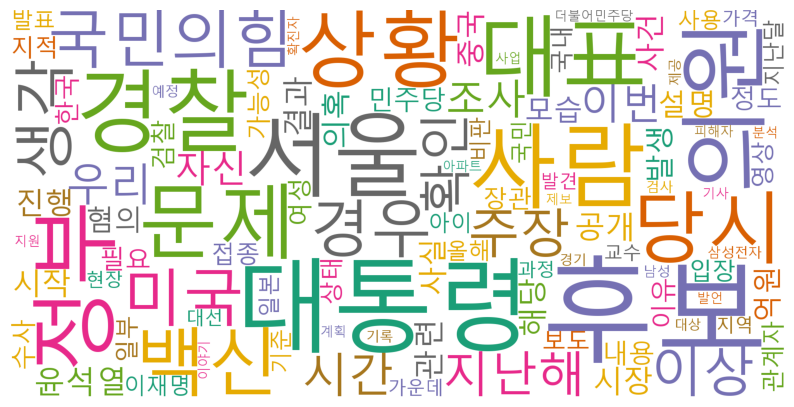

In [89]:
# 워드클라우드 생성
wc = WordCloud(font_path='malgun',width=2000, height=1000,background_color='white',colormap='Dark2',random_state=2)
wc.generate_from_frequencies(*r5)

fig=plt.figure()
fig.set_size_inches(10,10)

plt.axis('off')
plt.imshow(wc)
plt.savefig(foldert + '/result2.png')

---

In [ ]:
for i in range(len(b)):
    print("idx =", i)
    tk_df3 = pd.read_csv(folder3 + "/tk_df" + str(i) + ".csv", encoding="utf-8-sig", index_col = 0)
    r6 = tk_df3.set_index("keywords").T.to_dict('records')
    
    # 워드클라우드 생성
    wc = WordCloud(font_path='malgun',width=2000, height=1000,background_color='white',colormap='Dark2',random_state=2)
    wc.generate_from_frequencies(*r6)

    fig=plt.figure()
    fig.set_size_inches(10,10)

    plt.axis('off')
    plt.imshow(wc)
    plt.savefig(foldert + '/wc/wc' + str(i) + '.png')
    print("DONE")